# Predicción de precio de ventas por regresiones
Amaro Santiago Oscar Jair 
---


# Dependencias 


In [1]:
from scipy import stats                             # Para calcular estadisticos
import numpy as np                                  # Para trabajar con arrays
import pandas as pd                                 # Para trabajar con dataframes
import matplotlib                                   # Para graficar
import matplotlib.pyplot as plt                     # Para graficar
import math                                         # Para trabajar con funciones matematicas
import seaborn as sns                               # Para graficar
from sklearn.linear_model import Lasso              # Para trabajar con modelos de regresion
from sklearn.linear_model import Ridge              # Para trabajar con modelos de regresion
from sklearn.linear_model import LinearRegression   # Para trabajar con modelos de regresion
import warnings                                     # Para ignorar warnings
warnings.filterwarnings('ignore')                   # Para ignorar warnings

## Cargar datos
* Entrenamiento 
* Prueba 
* muestra



In [2]:
# Cargamos el dataset de entrenamiento , index_col = "Id" para que tome la primera columna como indice
train = pd.read_csv(r"C:/Users/oscar/Downloads/train.csv", index_col = "Id")

# Cargamos el dataset de test , index_col = "Id" para que tome la primera columna como indice
test = pd.read_csv(r"C:/Users/oscar/Downloads/test.csv", index_col = "Id") 

# Cargamos el dataset de muestra, suponiendo que son datos que nos darias no trabajamos con datos que no tienen
sample = pd.read_csv(r"C:/Users/oscar/Downloads/sample_submission.csv", index_col = "Id") 

##  Correlación de los datos

La correlación es una medida estadística que permite evaluar la relación entre dos variables cuantitativas. En el contexto del análisis de datos con Python, la correlación es una herramienta muy útil para explorar la relación entre diferentes variables y entender cómo se relacionan entre sí.

Hay varias razones por las cuales puede ser útil hacer una correlación de los datos en Python, algunas de las cuales incluyen:

* Identificación de patrones: La correlación puede ayudar a identificar patrones y relaciones en los datos que de otro modo podrían pasar desapercibidos. Por ejemplo, si se está analizando un conjunto de datos de ventas, se puede usar la correlación para determinar si existe una relación entre el precio de un producto y la cantidad de unidades vendidas.

* Predicción de resultados: La correlación también puede ser útil para predecir resultados futuros. Por ejemplo, si se está analizando un conjunto de datos de clima, se puede usar la correlación para determinar si existe una relación entre la temperatura y la cantidad de lluvia que cae en un determinado día. Esto puede ayudar a predecir el clima futuro y tomar medidas en consecuencia.

* Validación de modelos: La correlación también se puede utilizar para validar modelos estadísticos. Por ejemplo, si se está construyendo un modelo de regresión lineal para predecir el precio de una casa en función de sus características, se puede usar la correlación para evaluar si existe una relación significativa entre cada una de las variables independientes y la variable dependiente.
---
Para la simulacion de esta practica haremos un énfasis que nosotros trabajaremos con variables explicativas que sean totalmente numéricas, existe una gran cantidad de variables categóricas que presenta la información, sin embargo, con la finalidad de mantener un tanto de parsimonía en el modelo, simplemente ubicaremos a las variables que sean numéricas. Vamos a ver la correlación que tiene toda la tabla de entrenamiento, que es con la que alimentaremos el modelo.



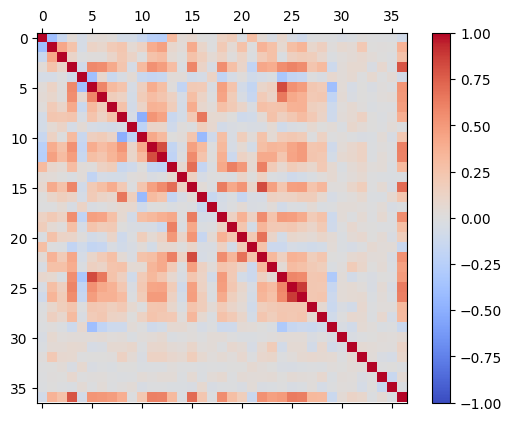

In [3]:
figure = plt.figure()                # Creamos una figura 
axes = figure.add_subplot(111)       # Creamos un subplot en la figura 111 es el numero de filas, columnas y el numero de subplot

caxes = axes.matshow(train.corr(), cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1) # Creamos una matriz de correlacion con los datos de train
figure.colorbar(caxes)               # Creamos un colorbar para la matriz de correlacion

plt.show()                           # Mostramos la figura

* La función axes.matshow() muestra una matriz como una imagen de colores, donde los valores más altos se representan con colores más brillantes. Esta función es útil para visualizar la correlación entre variables en un conjunto de datos.

* Puedes agregar varias opciones a axes.matshow() para personalizar la visualización. Algunas de las opciones comunes incluyen:

* cmap: Define el mapa de colores a utilizar. Por ejemplo, cmap='coolwarm' utiliza el mapa de colores 'coolwarm', que va desde azul oscuro a rojo oscuro.
* interpolation: Define la técnica de interpolación utilizada para suavizar la imagen. Por ejemplo, interpolation='nearest' utiliza la interpolación de vecino más cercano, que es útil para matrices con valores discretos.
*vmin y vmax: Define los valores mínimo y máximo para la escala de colores. Por ejemplo, vmin=-1 y vmax=1 establecen los valores mínimo y máximo de la escala de colores en -1 y 1, respectivamente.

<AxesSubplot: >

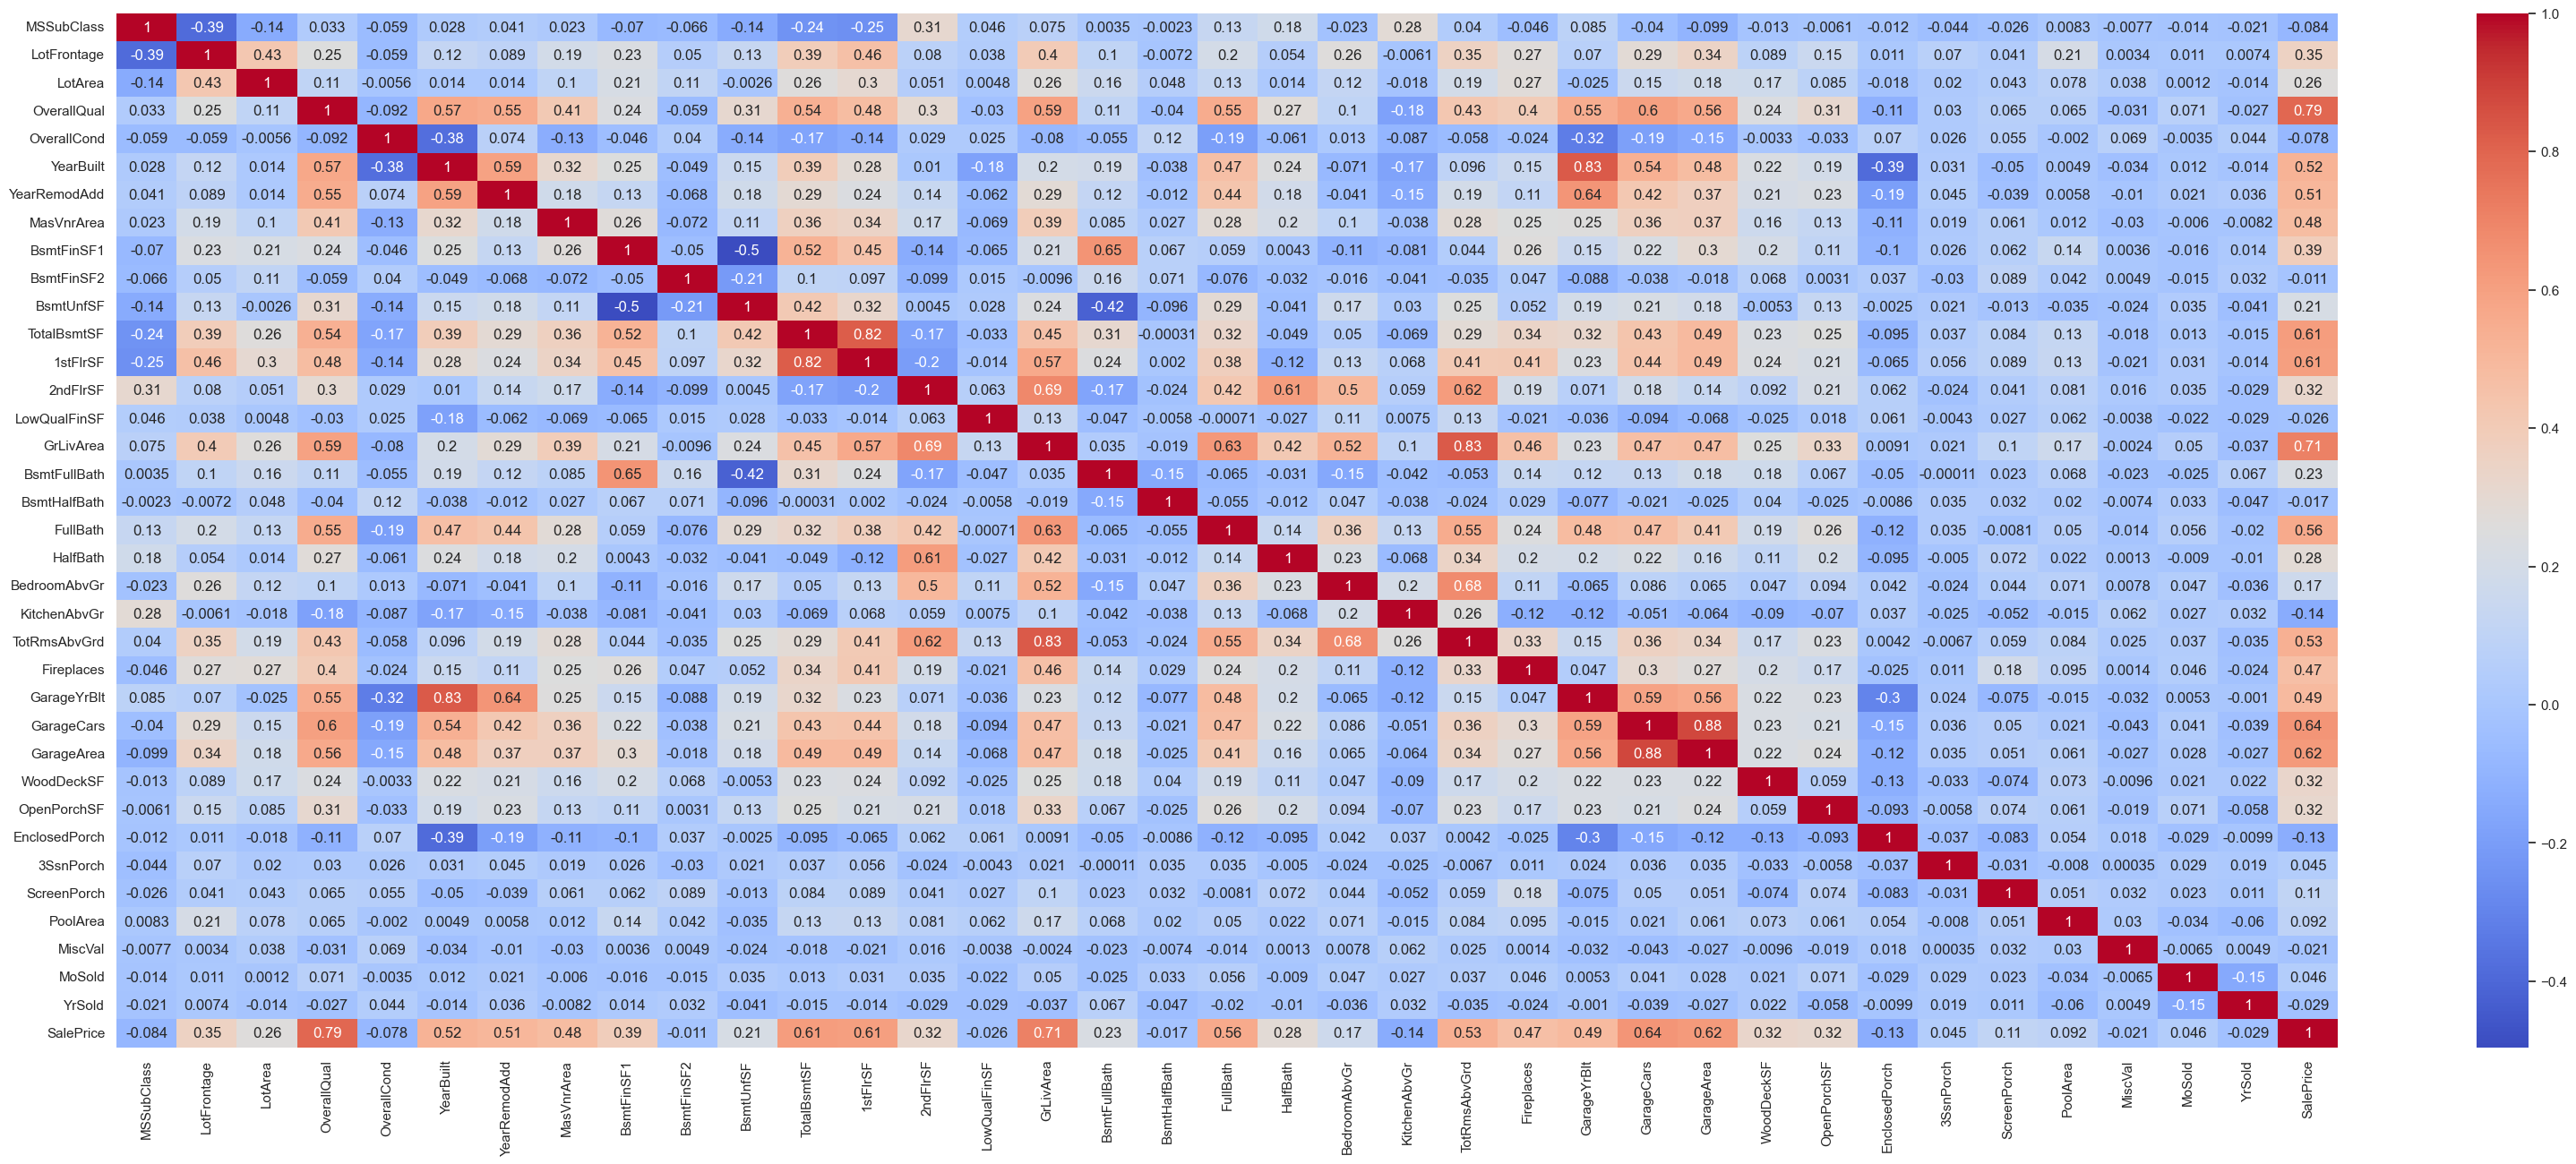

In [4]:
sns.set(rc={'figure.figsize':(40,15)}) # Definimos el tamaño de la figura que vamos a mostrar ( 40 x 15 )
sns.heatmap(train.corr(),              # Mostramos la matriz de correlación 
            annot=True,                # annot hace que se muestren los valores de correlación
            cmap='coolwarm')           # cmap es el color de la matriz de correlación
                                       # Mostramos la matriz de correlación

* Tanto sns.heatmap(train.corr()) como axes.matshow(train.corr()) son funciones que se utilizan para visualizar matrices de correlación en Python. Sin embargo, existen algunas diferencias en cuanto a la funcionalidad y apariencia de estas dos funciones.

* La función sns.heatmap(train.corr()) pertenece a la biblioteca Seaborn, que es una extensión de Matplotlib. Seaborn es conocida por su capacidad para crear visualizaciones estadísticas atractivas y sofisticadas. La función sns.heatmap() crea un mapa de calor, que es una forma de visualización de datos en dos dimensiones que utiliza una escala de colores para representar los valores de la matriz. Además, sns.heatmap() tiene la capacidad de agregar anotaciones para los valores de la matriz y personalizar la apariencia de la visualización. Por ejemplo, puedes agregar barras de colores, establecer los límites de los ejes y agregar títulos y etiquetas a los ejes.

* Por otro lado, axes.matshow(train.corr()) es una función de Matplotlib que muestra una matriz como una imagen de colores, donde los valores más altos se representan con colores más brillantes. axes.matshow() también tiene la capacidad de personalizar la apariencia de la visualización, pero su funcionalidad es más limitada que la de sns.heatmap().

* En si sns.heatmap() es una función más flexible y avanzada que permite crear visualizaciones estadísticas más sofisticadas, mientras que axes.matshow() es una función simple que se utiliza para crear imágenes de colores de matrices.
---
¿Cual usar?

* Si buscas una visualización simple y rápida de una matriz de correlación, axes.matshow() es una buena opción. Esta función es fácil de usar y ofrece una vista rápida de los patrones de correlación en la matriz.

* Por otro lado, si buscas una visualización más personalizable y sofisticada, sns.heatmap() puede ser una mejor opción. Esta función permite agregar anotaciones a los valores de la matriz, personalizar la escala de colores, ajustar la apariencia de la visualización y agregar otros elementos como títulos y etiquetas de ejes.

Notemos que en general la mayoría de las variables que estamos trabajando no guardan multicolinealidad, es decir: que existe una baja correlación entre las variables en el conjunto de datos. Esto significa que cada variable aporta información única al modelo y que es más fácil interpretar los coeficientes de regresión y obtener estimaciones precisas de ellos. En general, esto hace que el análisis sea más confiable y preciso.

 Lo que haremos a continuación es buscar las variables explicativas que guarden una correlación mayor con la respuesta, 'PriceSales'
. Para esto, filtraremos las variables explicativas tales que guarden una correlación mayor que 0.6 con la respuesta


In [5]:
MC = train.corr()                              # Creamos una matriz de correlacion con los datos de train 
SaleCorr = abs(MC.loc[:,"SalePrice"])          # Creamos una serie con los valores de correlacion con SalePrice 
aux = SaleCorr.sort_values(ascending = False)  # Ordenamos los valores de correlacion de mayor a menor 
Explicativas = aux.index[aux>0.6]              # Creamos una lista con los nombres de las variables con correlacion mayor a 0.6
train_selec = train[Explicativas]              # Creamos un dataframe con las variables seleccionadas 

Veamos un gráfico de la correlación con las variables que hemos extraido.

<AxesSubplot: >

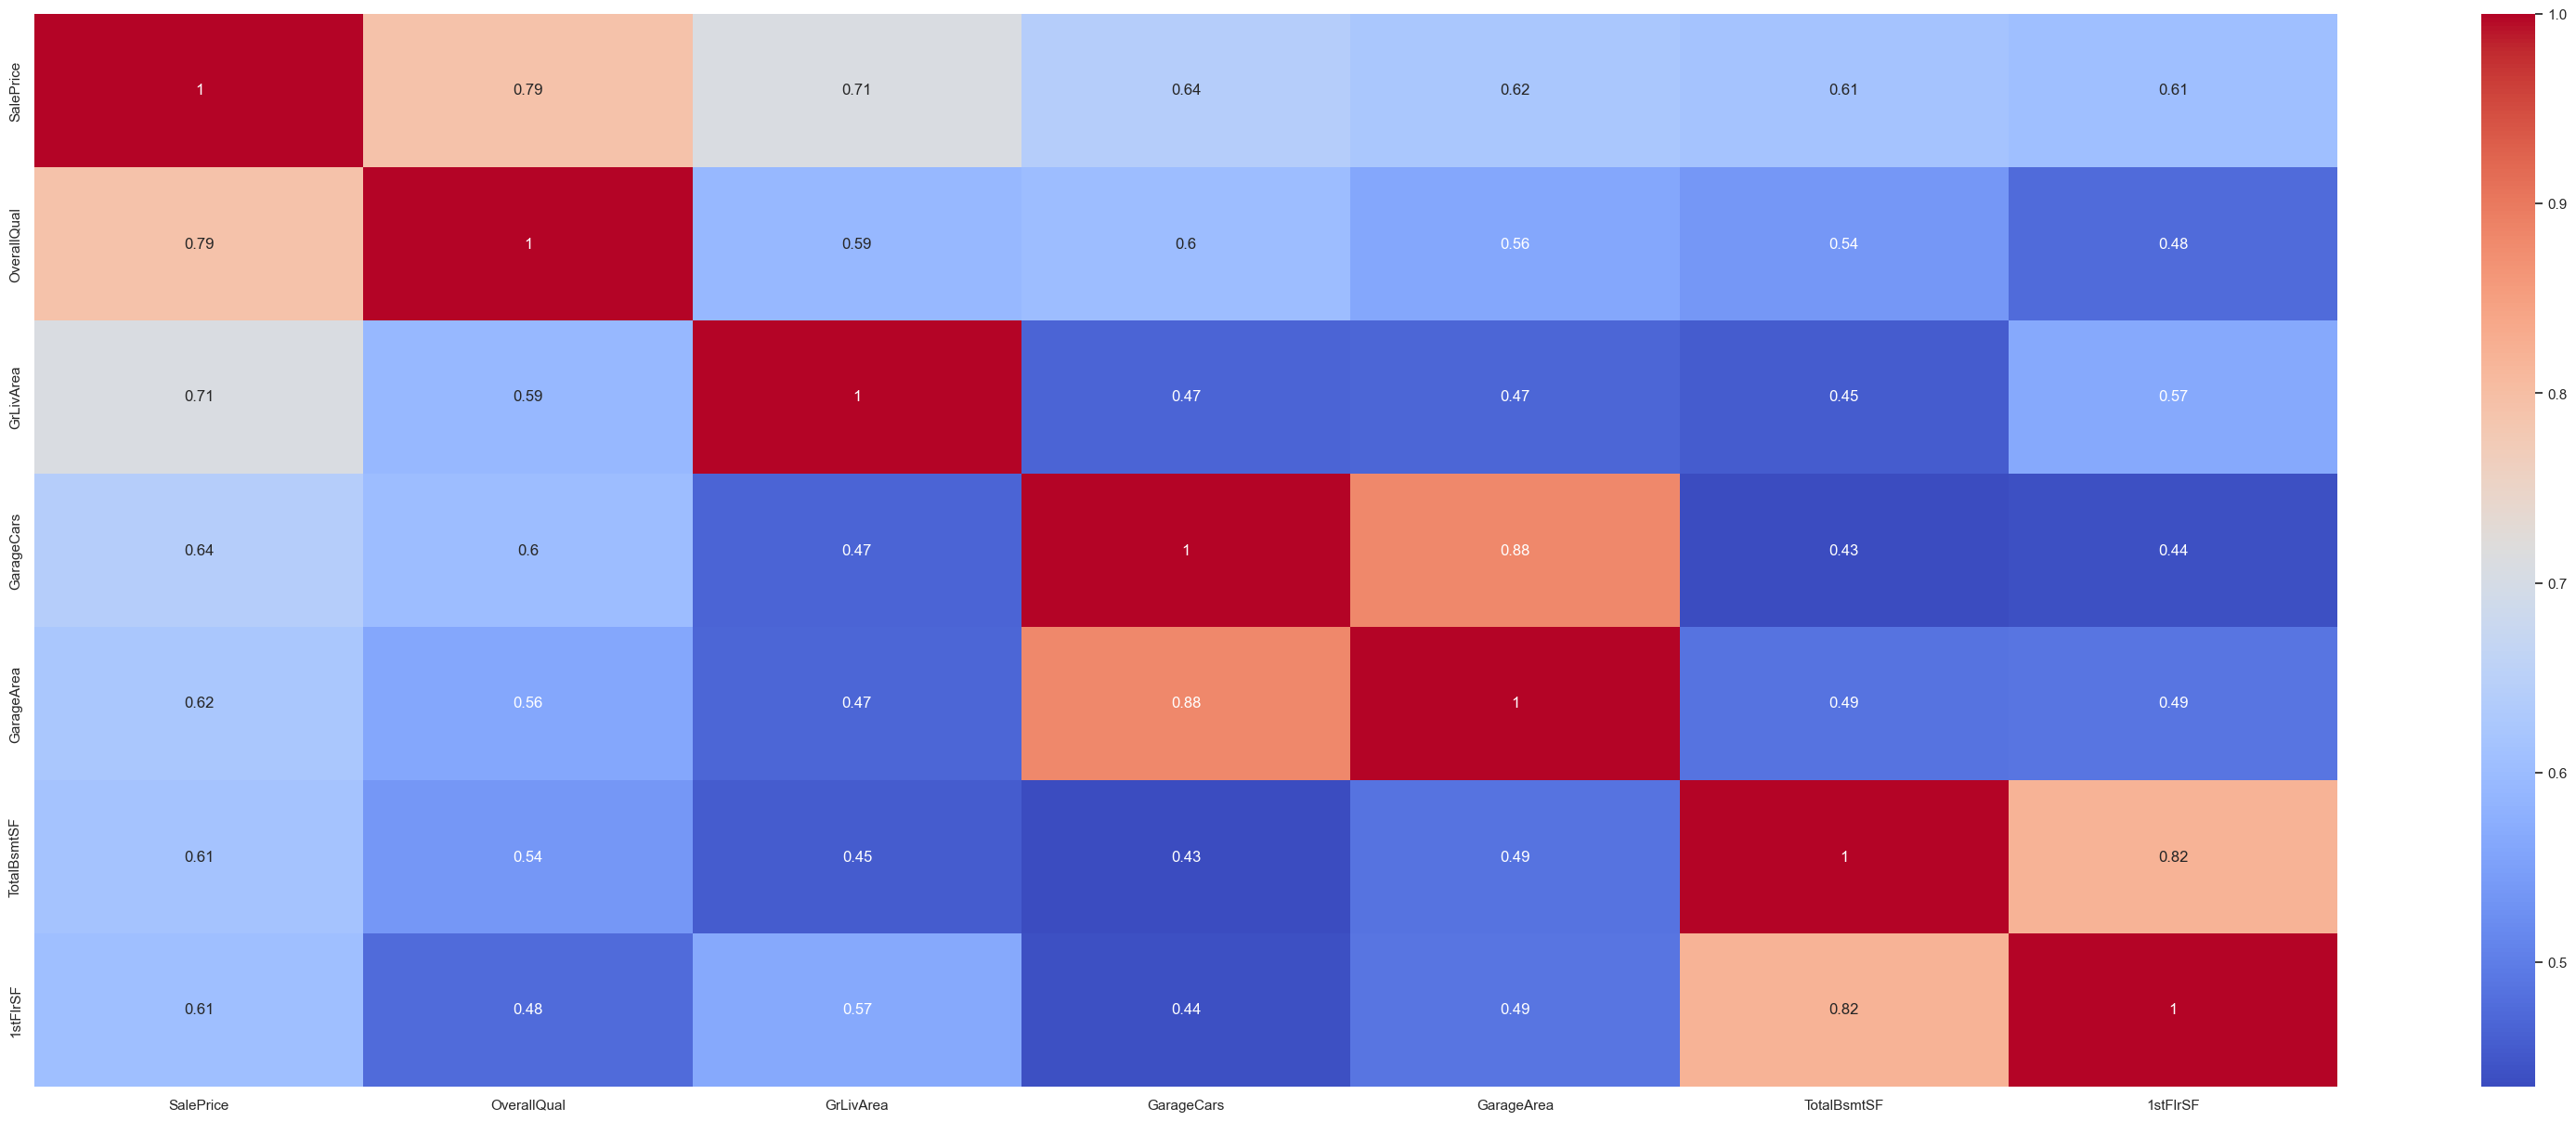

In [6]:
sns.heatmap(train_selec.corr(), annot = True, cmap = 'coolwarm') # Mostramos la matriz de correlación




Vemos que hay mucha multicolinealidad entre algunas de las parejas de variables 
* 'GarageCars'
* 'GarageArea'
* 'TotalBsmtSF' - '1stFlrSF'

---
* esto significa que esas variables están altamente correlacionadas entre sí. La multicolinealidad alta puede afectar la interpretación del modelo y la precisión de las estimaciones de los coeficientes de regresión.

* En el contexto de un modelo de regresión múltiple, la multicolinealidad alta entre dos o más variables independientes puede hacer que el modelo tenga problemas para determinar la verdadera relación entre cada variable independiente y la variable de respuesta. La multicolinealidad también puede hacer que la interpretación de los coeficientes de regresión sea difícil, ya que las variables altamente correlacionadas pueden tener coeficientes que son inconsistentes con la dirección y la magnitud de sus efectos reales.

* Es importante tener en cuenta que la multicolinealidad no siempre es un problema en un análisis. En algunos casos, puede ser posible utilizar técnicas como la eliminación de variables o la transformación de variables para reducir la multicolinealidad y mejorar la precisión del modelo. Sin embargo, si la multicolinealidad es muy alta, esto puede dificultar la interpretación del modelo y puede ser necesario reconsiderar la inclusión de algunas variables en el análisis.


Para evitar la multicolinealidad vamos a extraer estas variables.

In [7]:
# Eliminamos las variables que tienen correlacion alta entre si   
train_selec = train_selec.drop(columns=['GarageCars', '1stFlrSF'])

Y veamos entonces el gráfico resultante con las variables seleccionadas.

<AxesSubplot: >

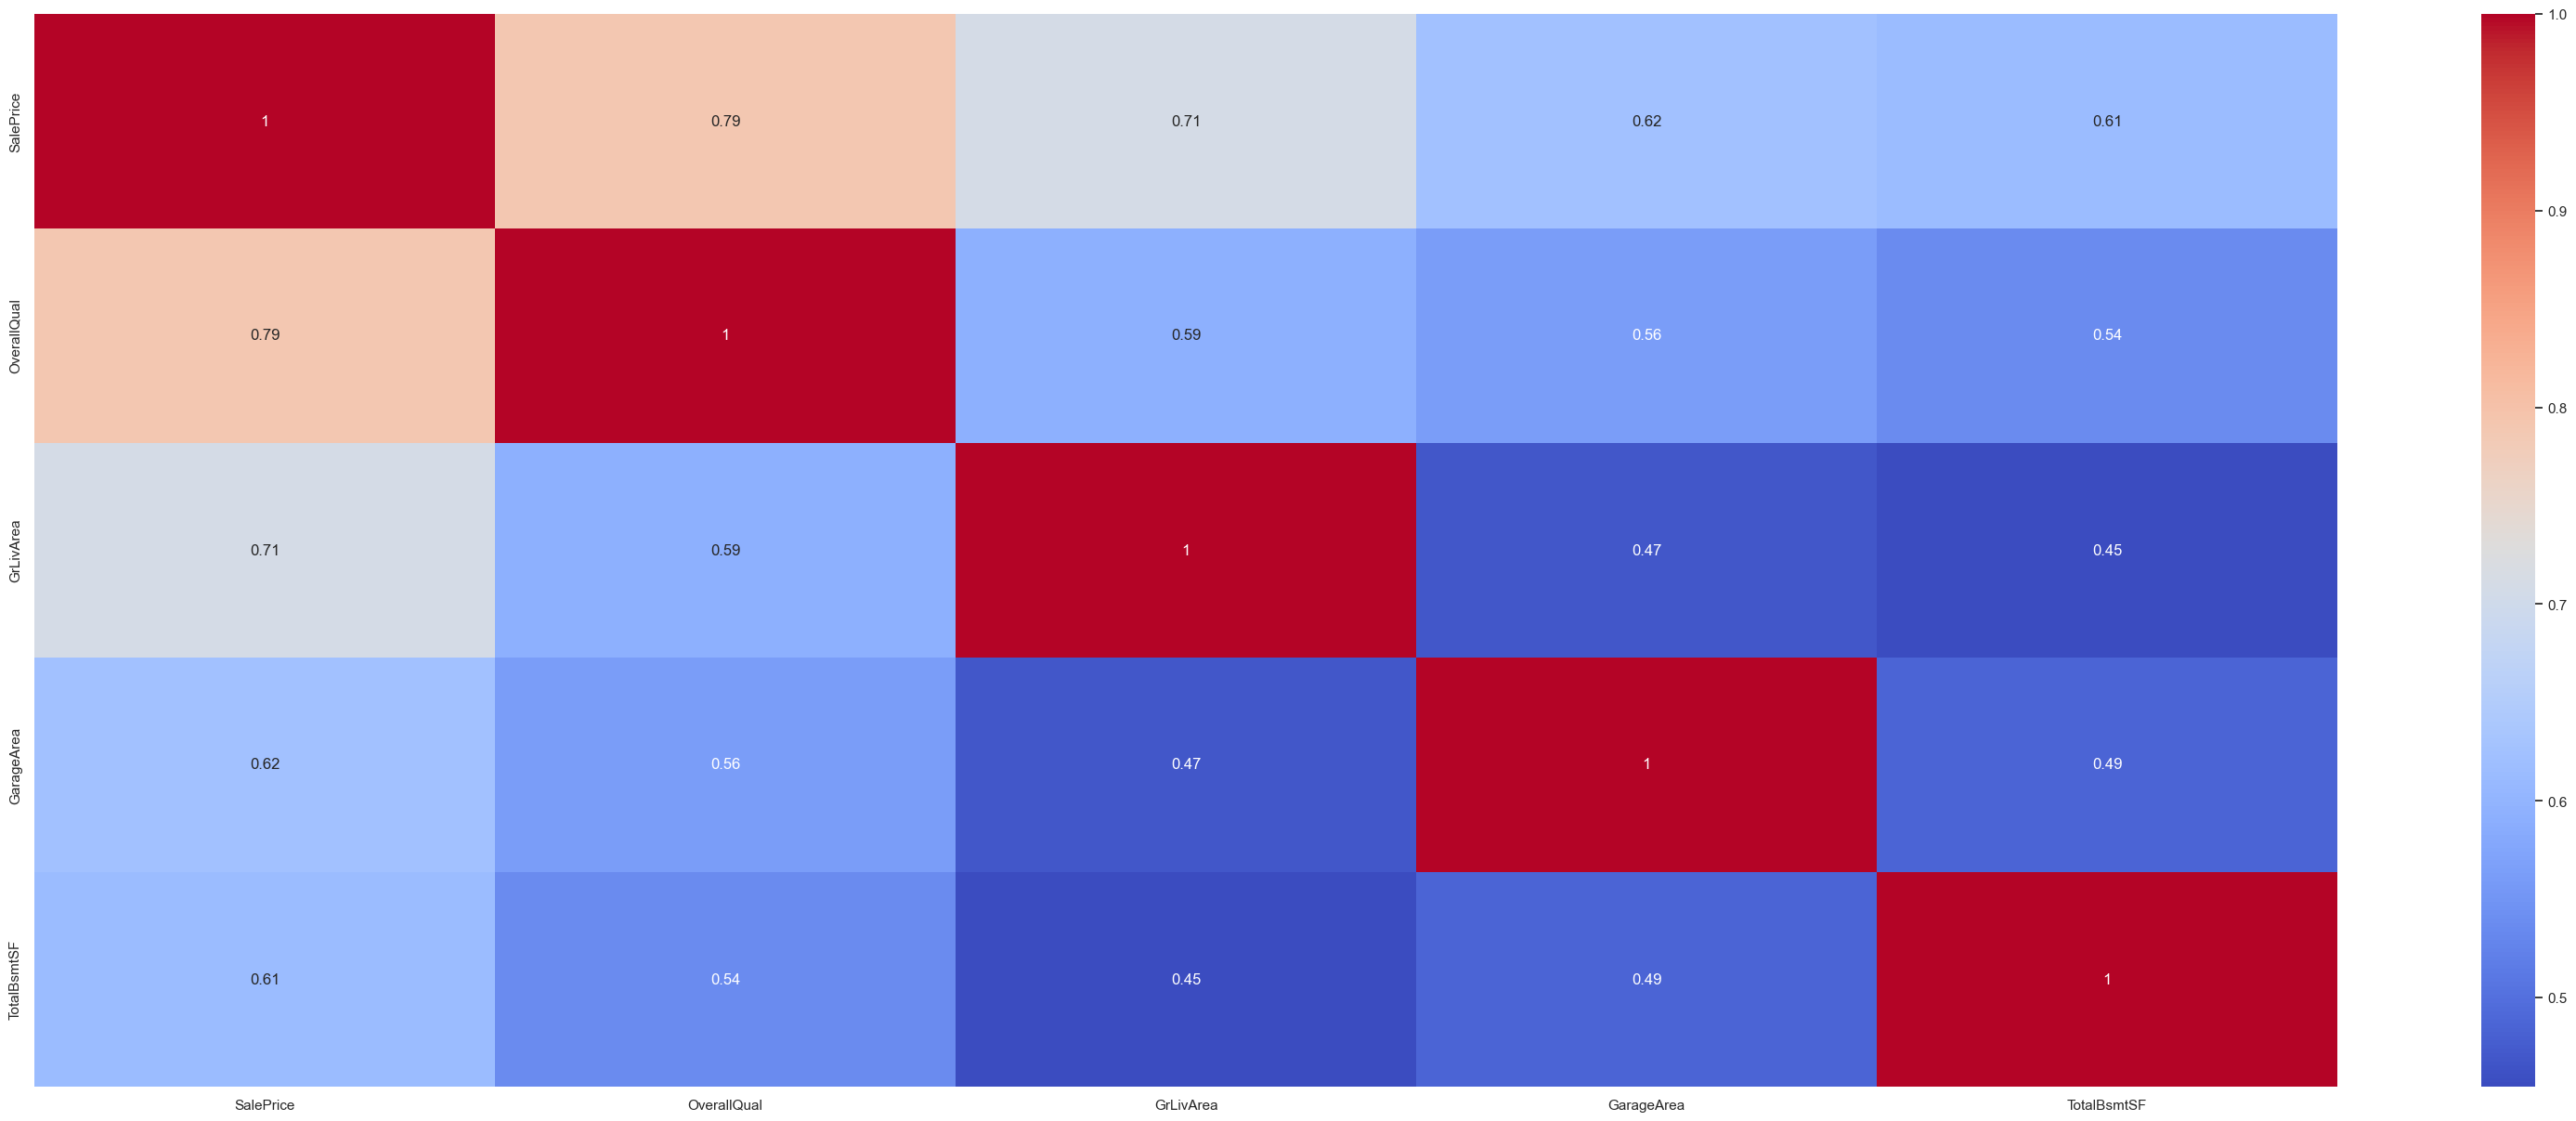

In [8]:
sns.heatmap(train_selec.corr(), annot = True, cmap = 'coolwarm') # Mostramos la matriz de correlación

Vamos a guardar en los objetos $X$ y $y$ las variables explicativas y la respuesta, respectivamente.

In [9]:
# Creamos un dataframe con las variables explicativas
X = train_selec.drop(columns = ['SalePrice'])

# Creamos una serie con la variable a predecir 
y = train_selec['SalePrice']                  

## Creación de Modelos

Haremos la creación de los modelos, los cuales vamos a alimentar con los objetos anteriores. Adicionalmente, vamos a mostrar, los coeficientes del modelo y estadísticas de las variables respuesta obtenidas

### Modelo lineal 

In [10]:
linear_model = LinearRegression(fit_intercept=True)                  # Creamos un modelo de regresion lineal 
linear_model.fit(X,y)                                                # Entrenamos el modelo con los datos de entrenamiento 
y_linear = linear_model.predict(X)                                   # Predecimos con los datos de entrenamiento 
aux = stats.describe(y_linear)                                       # Calculamos estadisticos de la prediccion 
df = pd.DataFrame([aux], columns=aux._fields)                        # Creamos un dataframe con los estadisticos 
df.round(3)                                                          # Mostramos el dataframe con 3 decimales 

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59644.12391656727, 673805.9903350526)",180921.196,4.779432e+09,0.75,2.277


* En la primera línea, se crea una instancia de la clase 
* LinearRegression, que es una clase de scikit-learn para modelos de regresión lineal. El argumento normalize se establece en False, lo que significa que los datos no se normalizarán antes del ajuste, y fit_intercept se establece en True, lo que significa que se ajustará la intercepción del modelo.

* En la segunda línea, se ajusta el modelo de regresión lineal a los datos de entrenamiento $X$ e $y$.

* En la tercera línea, se utiliza el modelo ajustado para predecir los valores de y para los mismos valores de $X$ utilizados en el ajuste.

* En la cuarta línea, se calculan algunos estadísticos de la predicción, como la media, la desviación estándar, el mínimo, el máximo, etc. Estos estadísticos se calculan utilizando la función stats.describe de la biblioteca SciPy.

* En la quinta línea, se crea un DataFrame de Pandas a partir de los estadísticos calculados, con el fin de presentarlos de manera más legible.

* Por último, en la sexta línea se redondean los valores en el DataFrame a 3 decimales utilizando el método round de Pandas.

In [11]:
aux = linear_model.coef_                    # Obtenemos los coeficientes del modelo 
df = pd.DataFrame([aux],columns=X.columns)  # Creamos un dataframe con los coeficientes 
print(df.round(3))                          # Mostramos el dataframe con 3 decimales

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF
0    24954.711     45.628      58.246       30.126


* En la primera línea, se obtienen los coeficientes del modelo ajustado utilizando el atributo coef_ de la instancia linear_model. Este atributo es un vector de coeficientes de tamaño n_features, donde n_features es el número de características en la matriz X utilizada para ajustar el modelo.

* En la segunda línea, se crea un DataFrame de Pandas a partir de los coeficientes obtenidos. La lista [aux] se utiliza para construir un DataFrame de una sola fila, mientras que columns=X.columns se utiliza para nombrar las columnas del DataFrame con los nombres de las características de X.

* En la tercera línea, se imprime el DataFrame de coeficientes redondeado a 3 decimales utilizando el método round de Pandas. Los coeficientes indican la importancia relativa de cada característica en el modelo de regresión lineal ajustado, es decir, cuánto contribuye cada característica a la predicción de y.

## Modelo Lasso
* En términos simples, Lasso busca ajustar un modelo de regresión lineal que tenga buen ajuste a los datos, pero que a su vez tenga los coeficientes de las variables menos importantes iguales a cero, lo que permite eliminar variables irrelevantes del modelo y así obtener un modelo más sencillo y fácil de interpretar.

* Lasso funciona añadiendo una penalización a la función de coste del modelo de regresión lineal, que es proporcional a la magnitud de los coeficientes. Esta penalización impone una restricción en la magnitud de los coeficientes, lo que hace que algunos de ellos sean reducidos a cero, eliminando así algunas variables del modelo. La magnitud de la penalización se controla con un parámetro llamado alpha, que se puede ajustar para obtener el equilibrio deseado entre precisión y simplicidad del modelo.

* Lasso es especialmente útil cuando se trabaja con conjuntos de datos con muchas características, donde no todas las características son relevantes para la predicción de la variable objetivo. También es útil cuando se desea interpretar el modelo resultante, ya que permite identificar fácilmente las variables más importantes para la predicción.

In [12]:
lasso_model = Lasso(alpha = 0.5, max_iter = int(1e6))     # Creamos un modelo de regresion lasso 
lasso_model.fit(X, y)                                     # Entrenamos el modelo con los datos de entrenamiento 
y_lasso = lasso_model.predict(X)                          # Predecimos con los datos de entrenamiento 
aux = stats.describe(y_lasso)                             # Calculamos estadisticos de la prediccion 
df = pd.DataFrame([aux], columns=aux._fields)             # Creamos un dataframe con los estadisticos 
df.round(3)                                               # Mostramos el dataframe con 3 decimales

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59642.907504949384, 673808.8131749406)",180921.196,4.779407e+09,0.75,2.277


se ajusta un modelo de regresión Lasso y se realizan algunas estadísticas descriptivas sobre la predicción del modelo.

* se ajusta un modelo de regresión Lasso con un valor de alpha igual a 0.5 y un máximo de iteraciones igual a 1 millón (convertido a un entero usando la función int()). Luego, se ajusta el modelo con los datos de entrada X y la variable objetivo y. Después, se realiza una predicción sobre los mismos datos de entrada X. 
* Se calculan algunas estadísticas descriptivas de la predicción y se muestran en un DataFrame de pandas redondeado a 3 decimales.
---
```
# Se define el modelo Lasso con un parámetro de regularización alpha igual a 0.5 y un máximo de iteraciones igual a 1 millón.
lasso_model = Lasso(alpha=0.5, max_iter=int(1e6))

# Se ajusta el modelo Lasso con los datos de entrada X y la variable objetivo y.
lasso_model.fit(X, y)

# Se realiza una predicción sobre los mismos datos de entrada X.
y_lasso = lasso_model.predict(X)

# Se calculan algunas estadísticas descriptivas de la predicción del modelo.
aux = stats.describe(y_lasso)
df = pd.DataFrame([aux], columns=aux._fields)
df.round(3)
```

In [13]:
aux=lasso_model.coef_                       # Obtenemos los coeficientes del modelo 
df = pd.DataFrame([aux],columns=X.columns)  # Creamos un dataframe con los coeficientes
df.round(3)                                 # Mostramos el dataframe con 3 decimales

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,24954.194,45.628,58.247,30.127


* los coeficientes del modelo Lasso ajustado utilizando la variable lasso_model.coef_. Estos coeficientes representan la magnitud y la dirección de la influencia de cada variable en la predicción del modelo.

* se crea un DataFrame de pandas con una sola fila y con columnas correspondientes a las variables de entrada X utilizando la función pd.DataFrame(). Los coeficientes se colocan en la fila y se especifican los nombres de las columnas utilizando el parámetro columns.

* se redondea el DataFrame a tres decimales utilizando la función round() 

## Modelo Ridge 
* regresión Ridge es una técnica de regresión lineal que utiliza una regularización L2 para reducir la complejidad del modelo y prevenir el sobreajuste (overfitting). El modelo Ridge agrega un término de penalización L2 a la función de pérdida de la regresión lineal ordinaria. Este término de penalización es proporcional al cuadrado de los coeficientes de la regresión, lo que hace que los coeficientes se vuelvan más pequeños y más uniformes.

* La regularización L2 en el modelo Ridge puede ayudar a manejar problemas de multicolinealidad en los datos, es decir, cuando hay una alta correlación entre dos o más variables de entrada. Además, el modelo Ridge también puede ayudar a mejorar la precisión de la predicción en conjuntos de datos con un tamaño de muestra pequeño o con una alta dimensionalidad (es decir, con un gran número de variables de entrada).

* El hiperparámetro clave en el modelo Ridge es el parámetro de regularización alpha, que controla el nivel de penalización de la complejidad del modelo. Un valor de alpha más grande dará como resultado un modelo más restringido, mientras que un valor más pequeño permitirá que el modelo tenga más flexibilidad.

In [14]:
ridge_model = Ridge(alpha=0.5)                # Creamos un modelo de regresion ridge 
ridge_model.fit(X,y)                          # Entrenamos el modelo con los datos de entrenamiento 
y_ridge = ridge_model.predict(X)                # Predecimos con los datos de entrenamiento
aux = stats.describe(y_ridge)                   # Calculamos estadisticos de la prediccion
df = pd.DataFrame([aux], columns = aux._fields) # Creamos un dataframe con los estadisticos
df.round(3)                                   # Mostramos el dataframe con 3 decimales

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59623.34441928903, 673854.5705534361)",180921.196,4.779005e+09,0.751,2.278


In [15]:
aux = ridge_model.coef_                    # Obtenemos los coeficientes del modelo 
df = pd.DataFrame([aux],columns=X.columns) # Creamos un dataframe con los coeficientes 
df.round(3)                                # Mostramos el dataframe con 3 decimales

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,24945.847,45.636,58.262,30.133


De donde vemos que los resultados son bastante similares entre todos los modelos

## Preparando la información 
En esta parte, vamos a procesar la tabla 'test' para que que podamos utilizar las variables explicativas que estamos manejando y también quitando los datos que no sean aceptables para realizar un modelo como los que hicimos arriba.

In [16]:
# Filtramos las covariables que vamos a utilizar
test_selec = test[X.columns]

# Procedemos a quitar algunos datos faltantes.
is_NaN = test_selec.isnull()
row_has_NaN = is_NaN.any(axis = 1)

# Nos quedamos con las que NO son NA
test_selec = test_selec[~row_has_NaN] # ~ es para negar la condicion de que sean NA
Xs = test_selec[~row_has_NaN]    # Nos quedamos con las covariables que no tienen NA 
ys = sample[~row_has_NaN]        # Nos quedamos con las observaciones que no tienen NA 
ysd=ys.describe()                # Calculamos estadisticos de la muestra 

##  Implementación de los modelos
* vamos a estar probando los modelos con el conjunto de entrenamiento, esto significa que vamos a pronosticar las respuestas con base en el modelo lineal apoyado por las variables explicativas y las vamos a comparar con las respuestas originales en un gráfico, donde esperaríamos ver la identidad lo más similarmente posible, esto estaría indicando un pronóstico adecuado de la respuesta. Recordemos que esta información viene del archivo 'train.csv'

* vamos a pronosticar las variables respuesta apoyados del archivo 'test.csv' donde vienen las variables explicativas y posteriormente vamos a comparar contra sus respuestas que se encuentran en el archivo 'sample_submission.csv'

## Modelo Lineal 
con el conjunto de entramiento

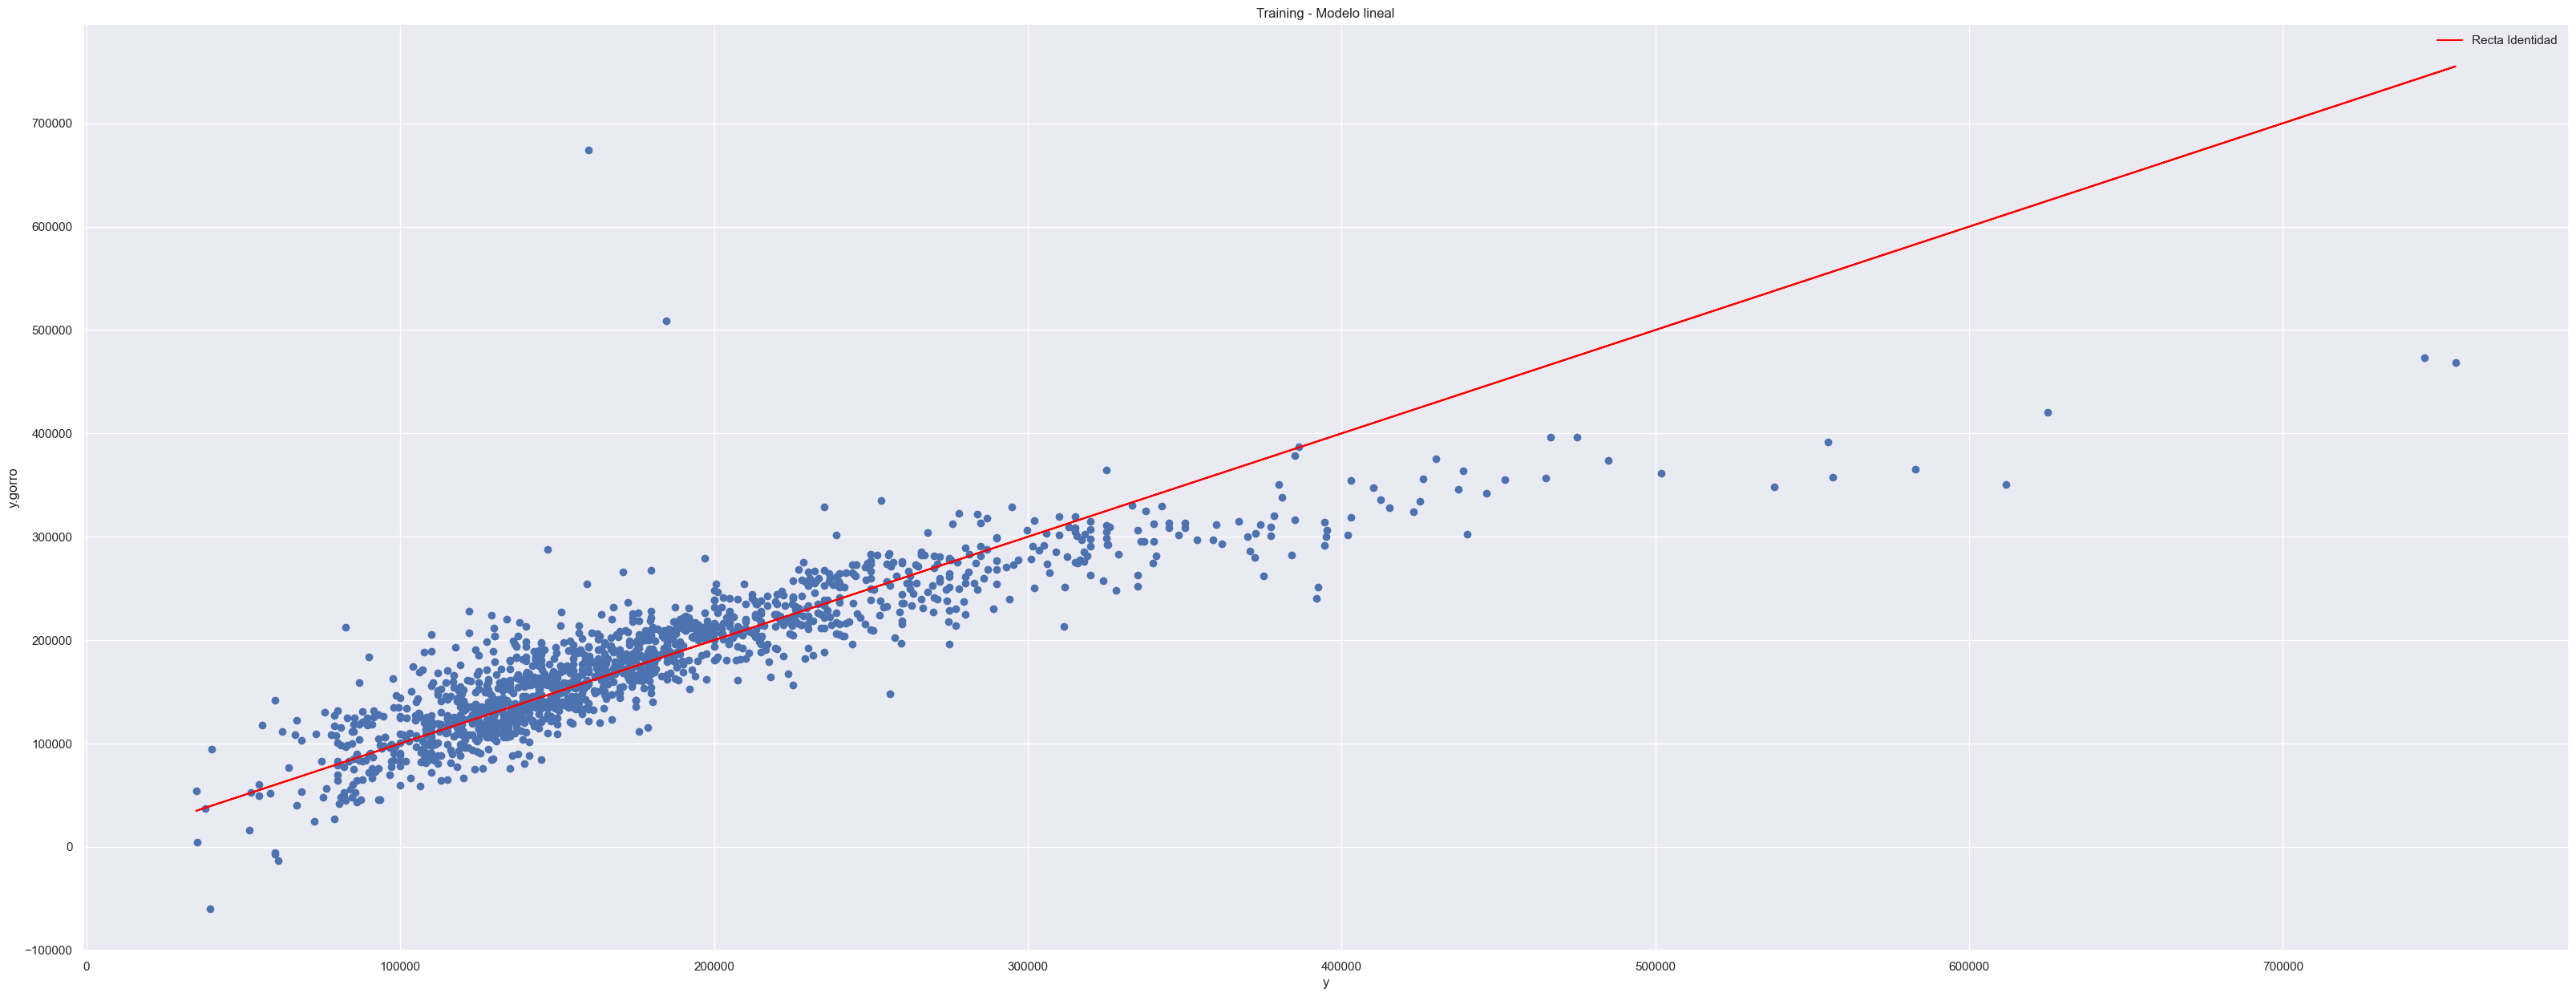

In [17]:
# Veamos entonces la comparación de la predicción con la real
plt.scatter(y,y_linear)                                     # Graficamos los valores reales vs los predichos por el modelo lineal 
plt.plot(y, y, '-',color="red",label="Recta Identidad")     # Graficamos la recta identidad 
plt.title('Training - Modelo lineal')                       # Titulo del grafico 
plt.xlabel('y')                                             # Etiqueta del eje x 
plt.ylabel('y.gorro')                                       # Etiqueta del eje y 
plt.legend(loc='best', frameon=False)                       # Mostramos la leyenda 
plt.show()                                                  # Mostramos el grafico

Con el conjunto de prueba 


In [18]:
# Luego hacemos la predicción del modelo
ys_hat=linear_model.predict(Xs)   # Predicción de las variables 
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Lineal - SalePrice']) # Creamos un dataframe con la predicción 

# Predicción de las variables
ys_hat.describe() # Calculamos estadisticos de la predicción 

,Estimación Lineal - SalePrice
count,1457.000000
mean,178787.855710
std,68964.808539
min,-19814.786217
25%,130112.717854
50%,169966.058659
75%,218823.226244
max,602892.264690


In [19]:
# Variables 'reales'
ysd # Calculamos estadisticos de la muestra 

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


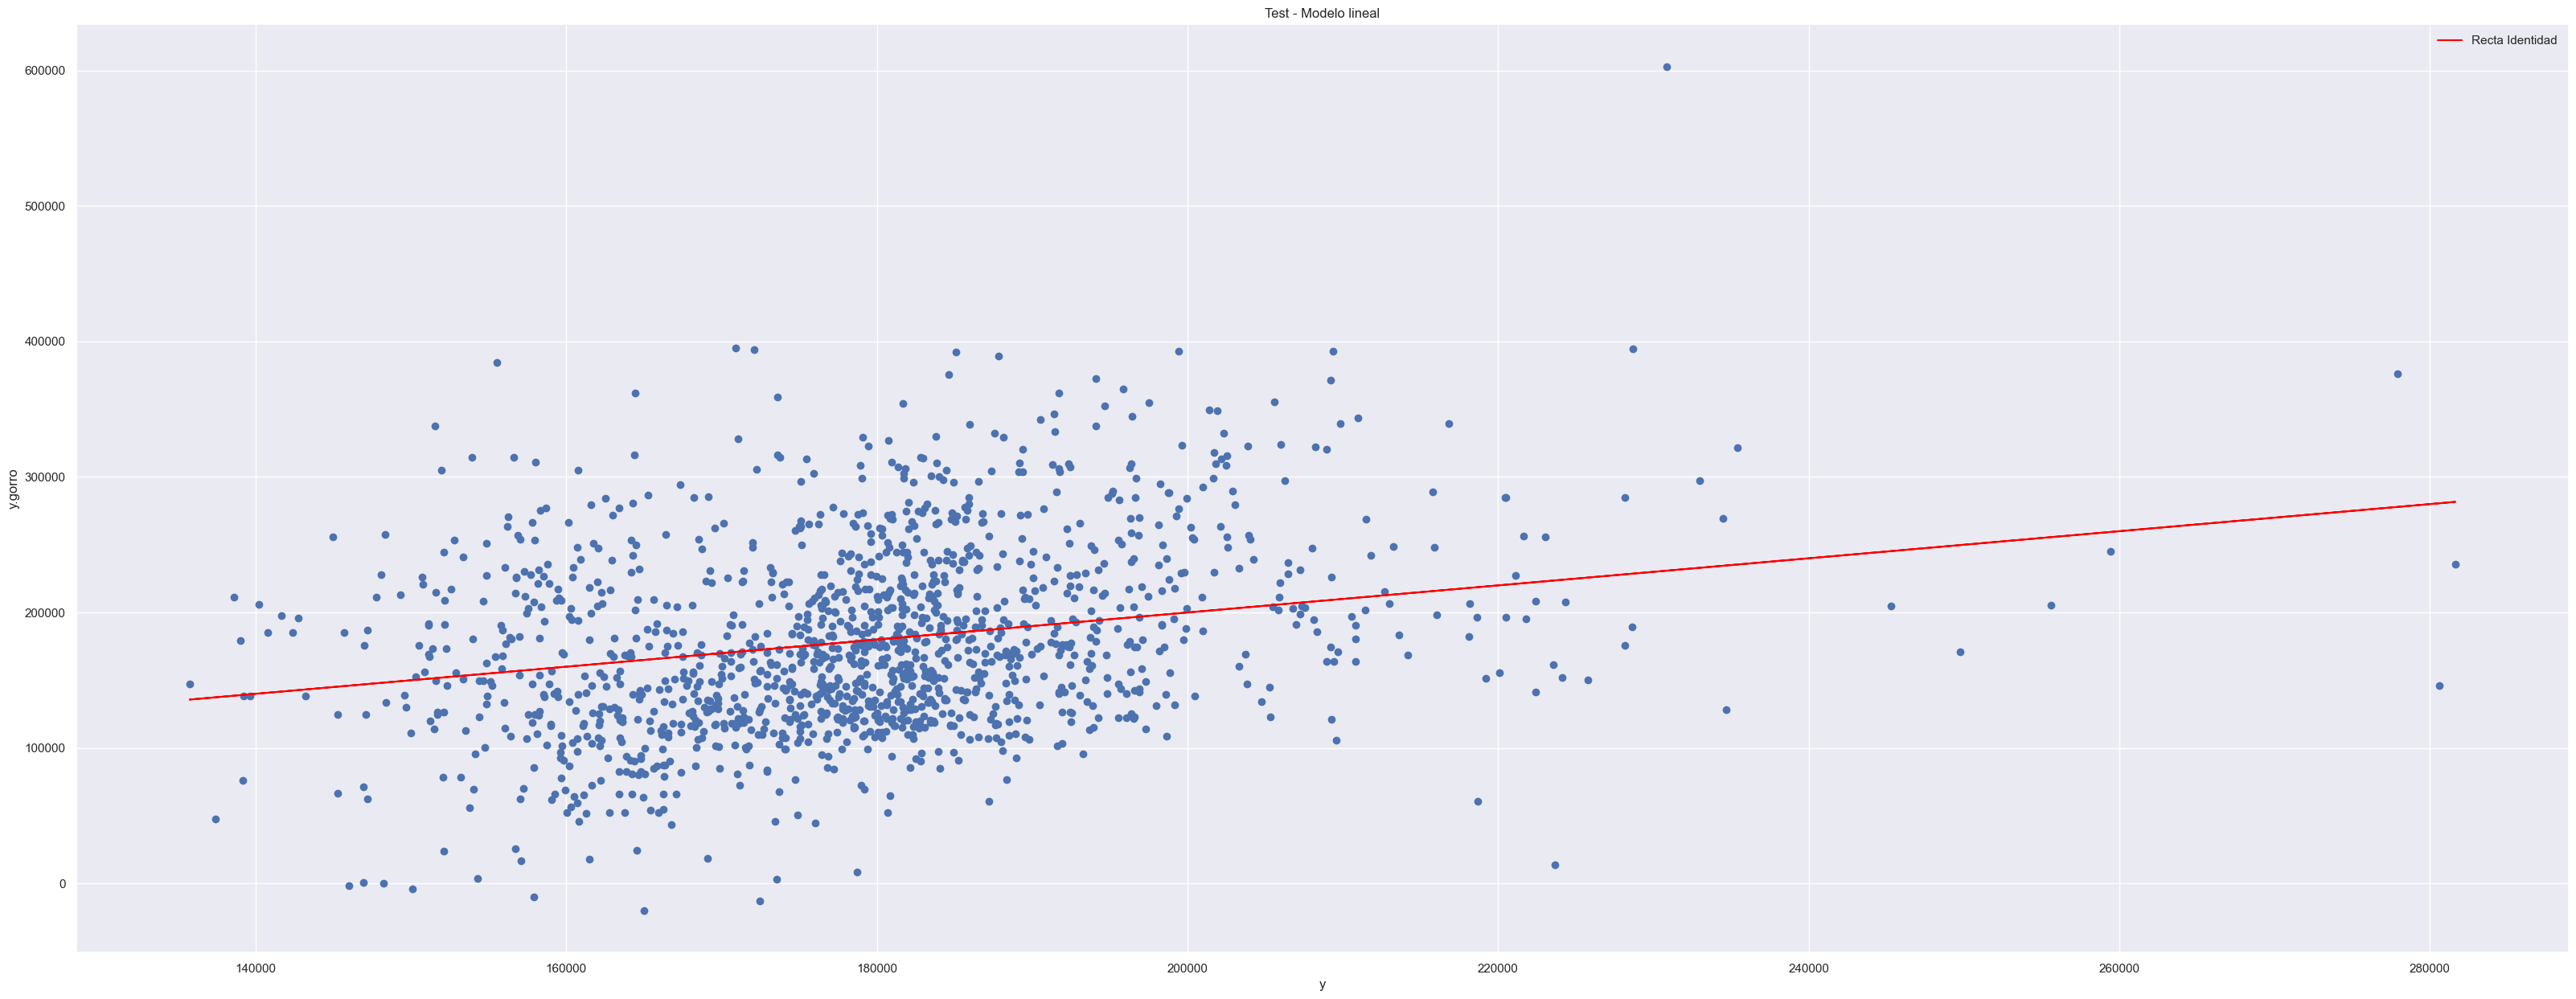

In [20]:
# Graficamos
plt.scatter(ys,ys_hat) # Graficamos los valores reales vs los predichos por el modelo lineal 
plt.plot(ys, ys, '-',color="red",label="Recta Identidad") # Graficamos la recta identidad
plt.title('Test - Modelo lineal') # Titulo del grafico 
plt.xlabel('y') # Etiqueta del eje x
plt.ylabel('y.gorro') # Etiqueta del eje y 
plt.legend(loc='best', frameon=False) # Mostramos la leyenda 
plt.show() # Mostramos el grafico 

## Modelo Lasso
Con el conjunto de entrenamiento 


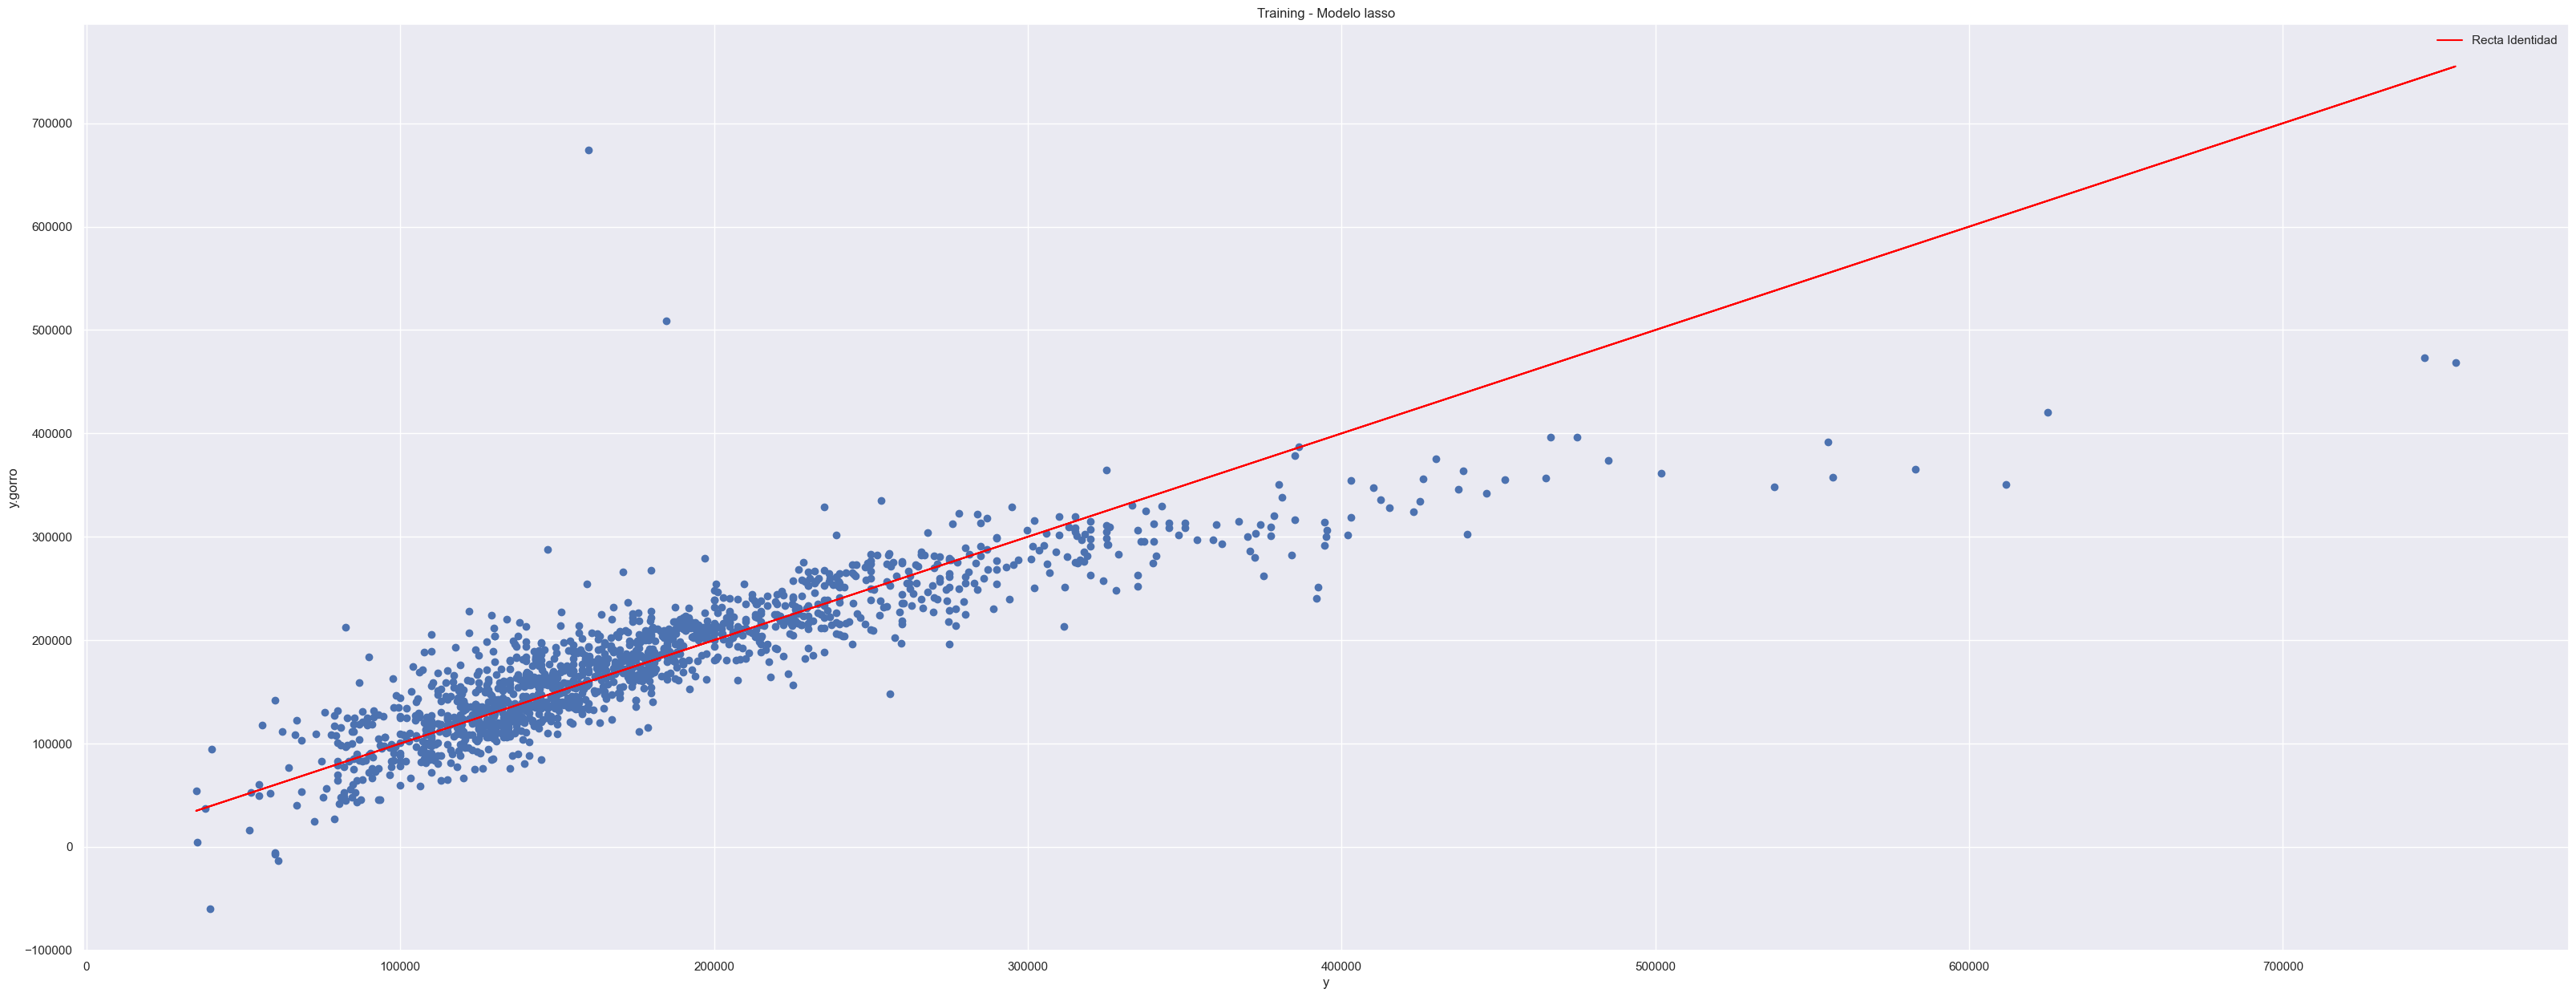

In [21]:
plt.scatter(y,y_lasso) # Graficamos los valores reales vs los predichos por el modelo lasso
plt.plot(y, y, '-',color="red",label="Recta Identidad") # Graficamos la recta identidad
plt.title('Training - Modelo lasso') # Titulo del grafico
plt.xlabel('y')
plt.ylabel('y.gorro') # Etiqueta del eje y
plt.legend(loc='best', frameon=False) # Mostramos la leyenda 
plt.show() # Mostramos el grafico 

Con el conjunto de prueba 

In [22]:
ys_hat=lasso_model.predict(Xs) # Predicción de las variables 
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Lasso - SalePrice']) # Creamos un dataframe con la predicción 

# Predicción de las variables
ys_hat.describe() # Calculamos estadisticos de la predicción

,Estimación Lasso - SalePrice
count,1457.000000
mean,178787.846684
std,68964.586697
min,-19813.930281
25%,130112.162618
50%,169966.025550
75%,218822.903208
max,602894.182335


In [23]:
# Variables 'reales'
ysd # Calculamos estadisticos de la muestra 

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


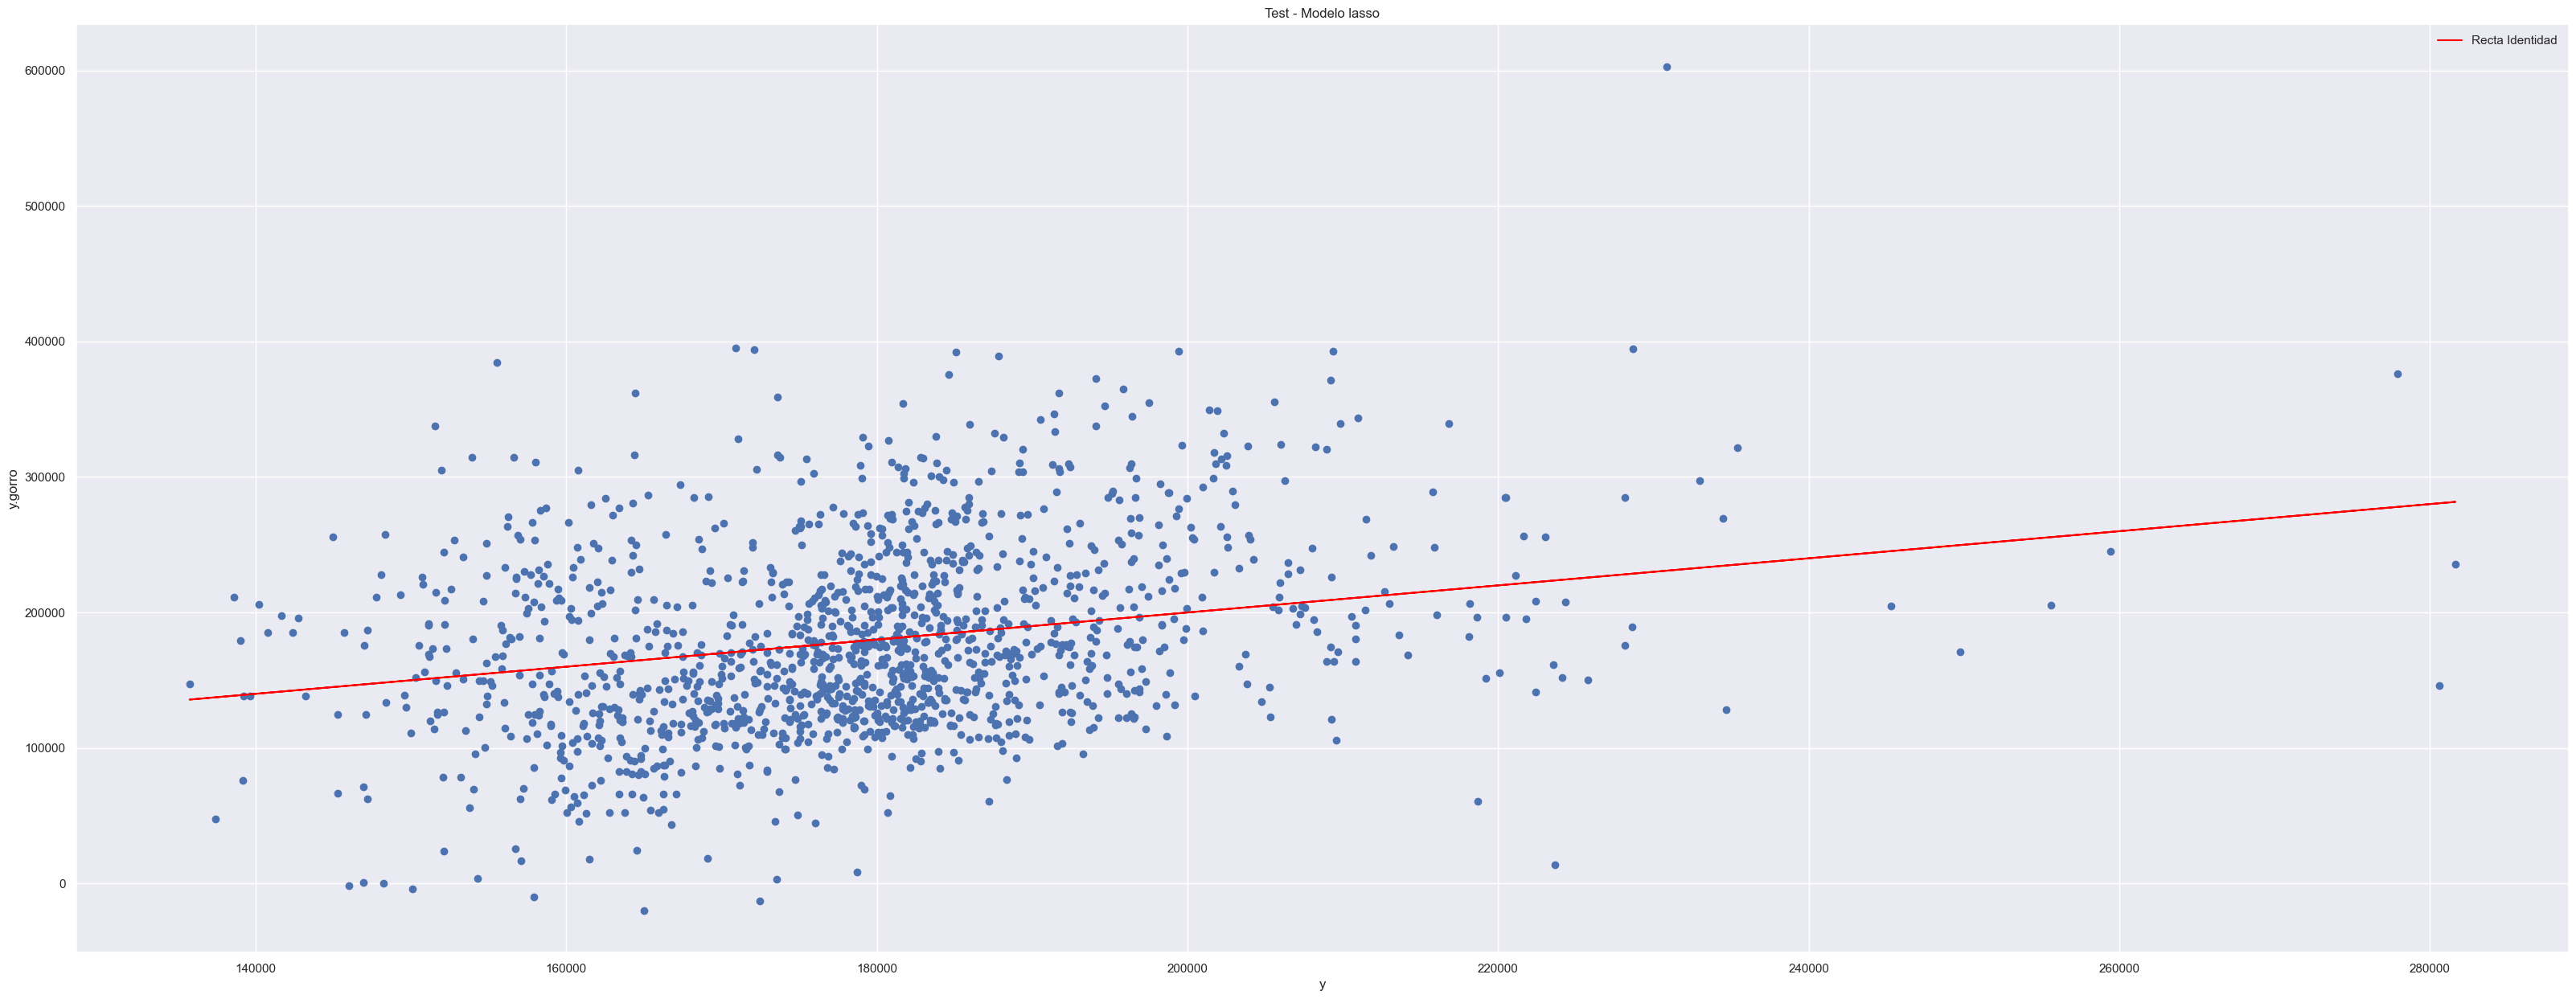

In [24]:
plt.scatter(ys,ys_hat) # Graficamos los valores reales vs los predichos por el modelo lasso 
plt.plot(ys, ys, '-',color="red",label="Recta Identidad") # Graficamos la recta identidad 
plt.title('Test - Modelo lasso') # Titulo del grafico 
plt.xlabel('y') # Etiqueta del eje x
plt.ylabel('y.gorro') # Etiqueta del eje y
plt.legend(loc='best', frameon=False) # Mostramos la leyenda
plt.show() # Mostramos el grafico

## Modelo Ridge 
Con el conjunto de entrenamiento 

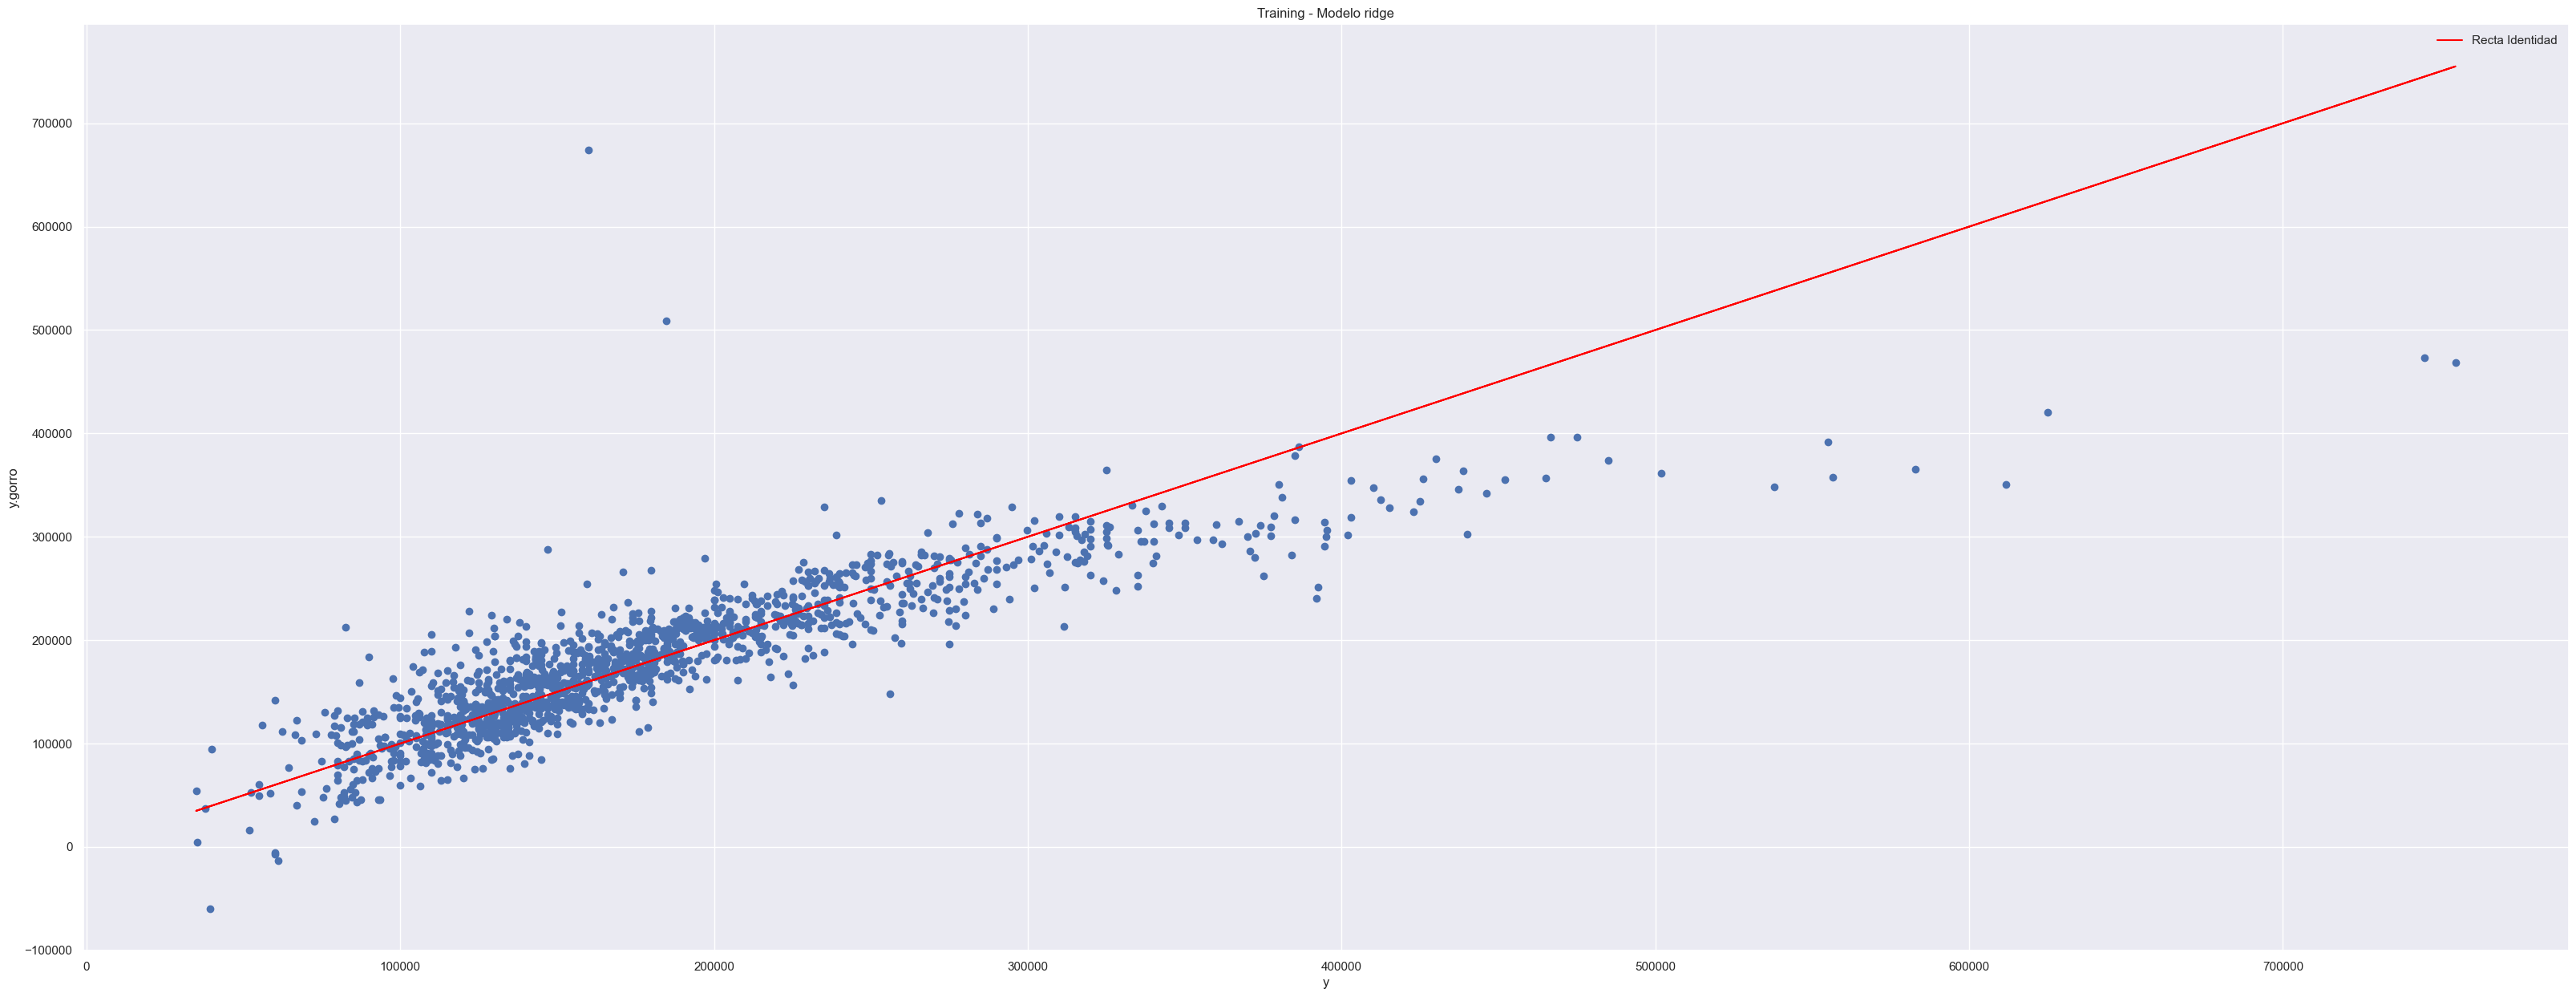

In [25]:
# Veamos entonces la comparación de la predicción con la real
plt.scatter(y,y_ridge)
plt.plot(y, y, '-',color="red",label="Recta Identidad")
plt.title('Training - Modelo ridge')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

Con el conjunto de prueba 

In [26]:
ys_hat=ridge_model.predict(Xs)
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Ridge - SalePrice'])

# Predicción de las variables
ys_hat.describe()

,Estimación Ridge - SalePrice
count,1457.000000
mean,178787.701125
std,68961.032541
min,-19800.192947
25%,130103.144763
50%,169965.487691
75%,218817.682353
max,602925.268753


In [27]:
# Variables 'reales'
ysd

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


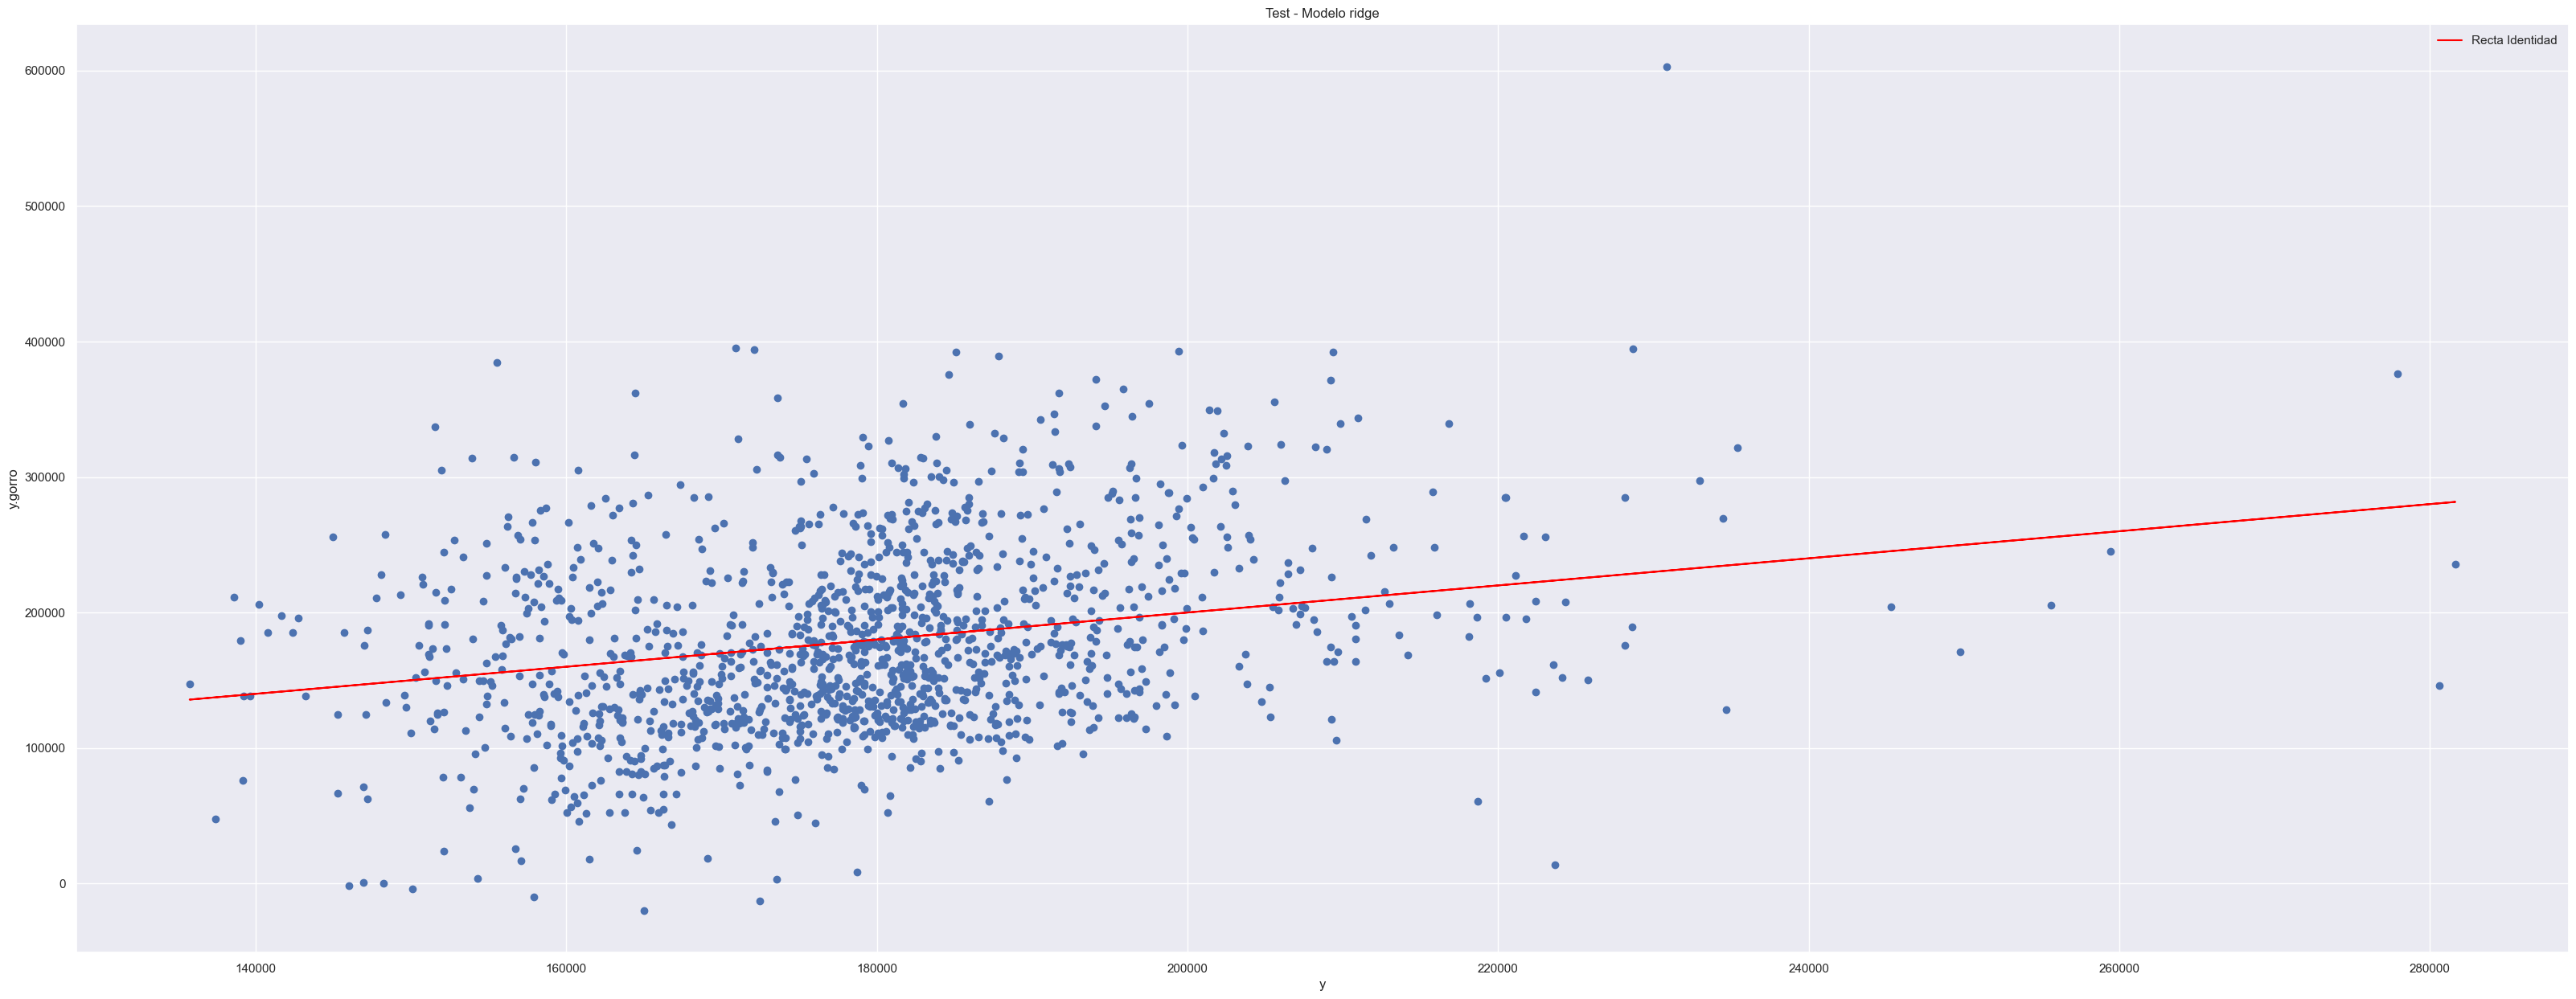

In [28]:
# Graficamos
plt.scatter(ys,ys_hat)
plt.plot(ys, ys, '-',color="red",label="Recta Identidad")
plt.title('Test - Modelo ridge')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

# Conlcusiones 

Ciertamente los modelos guardan parsimonía al tener pocos parámetros para estimar además de ser explicados únicamente en términos de variables que son totalmente numéricas. Sin embargo, aunque en el conjunto de entrenamiento parece funcionar de forma relativamente adecuada, parece que no se llega a modelar bien el comportamiento subyacente de los datos con este modelo, ya que presenta grandes diferencias a comparación de los precios que se encuentran en la tabla 'sample_submission' Además, los modelos parecen no diferir mucho entre sí, de hecho cambian realmente muy poco, lo cual podemos ver en los siguientes gráficos.

## Lineal vs Lasso

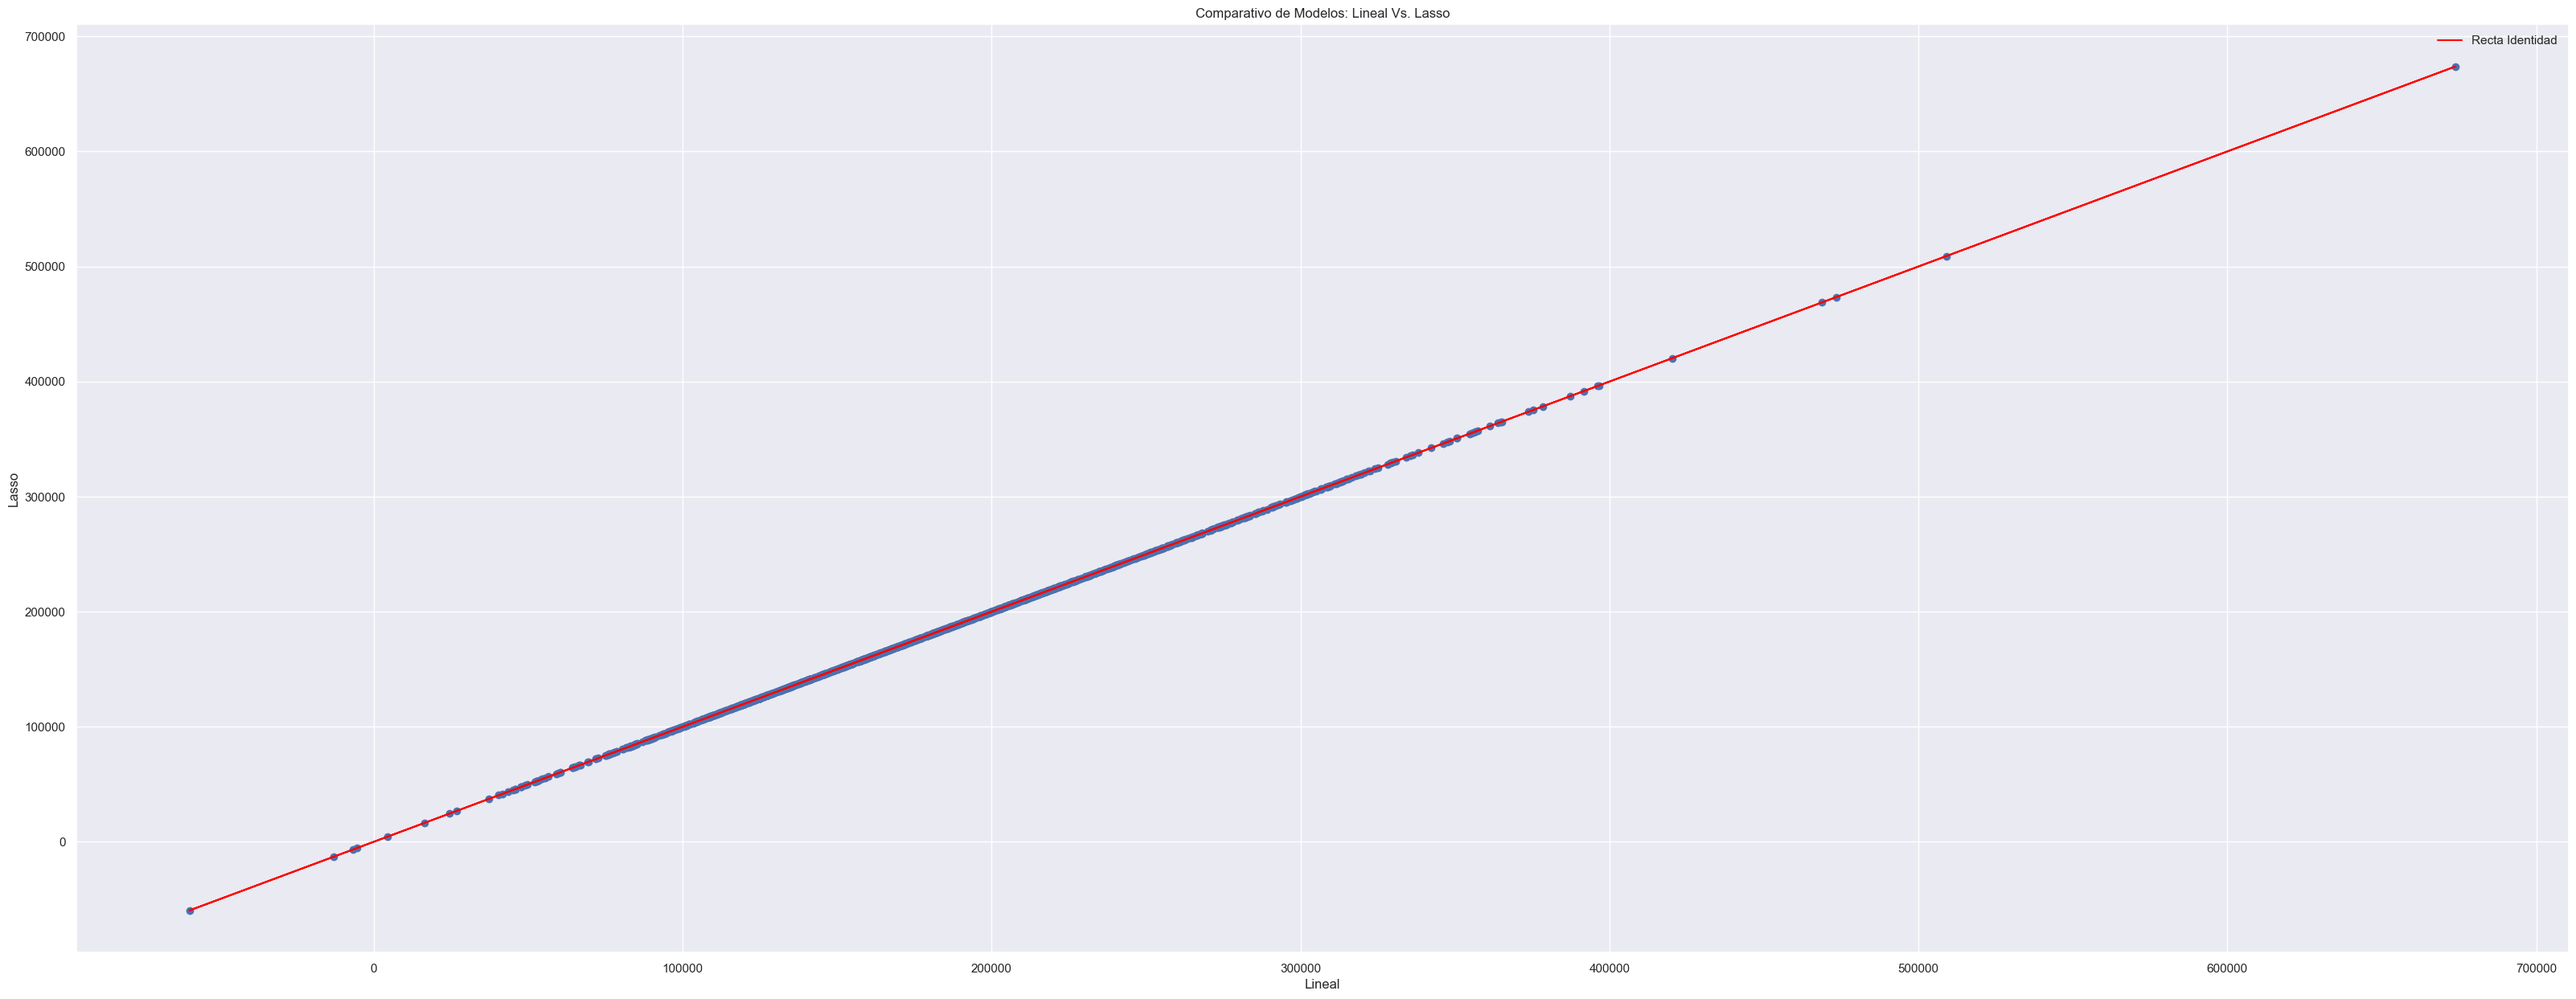

In [29]:
# Graficamos
plt.scatter(y_linear,y_lasso) # Graficamos los valores reales vs los predichos por el modelo lasso
plt.plot(y_linear, y_linear, '-',color="red",label="Recta Identidad") # Graficamos la recta identidad 
plt.title('Comparativo de Modelos: Lineal Vs. Lasso') # Titulo del grafico 
plt.xlabel('Lineal') # Etiqueta del eje x
plt.ylabel('Lasso') # Etiqueta del eje y
plt.legend(loc='best', frameon=False) # Mostramos la leyenda
plt.show() # Mostramos el grafico

## Lineal vs Ridge 

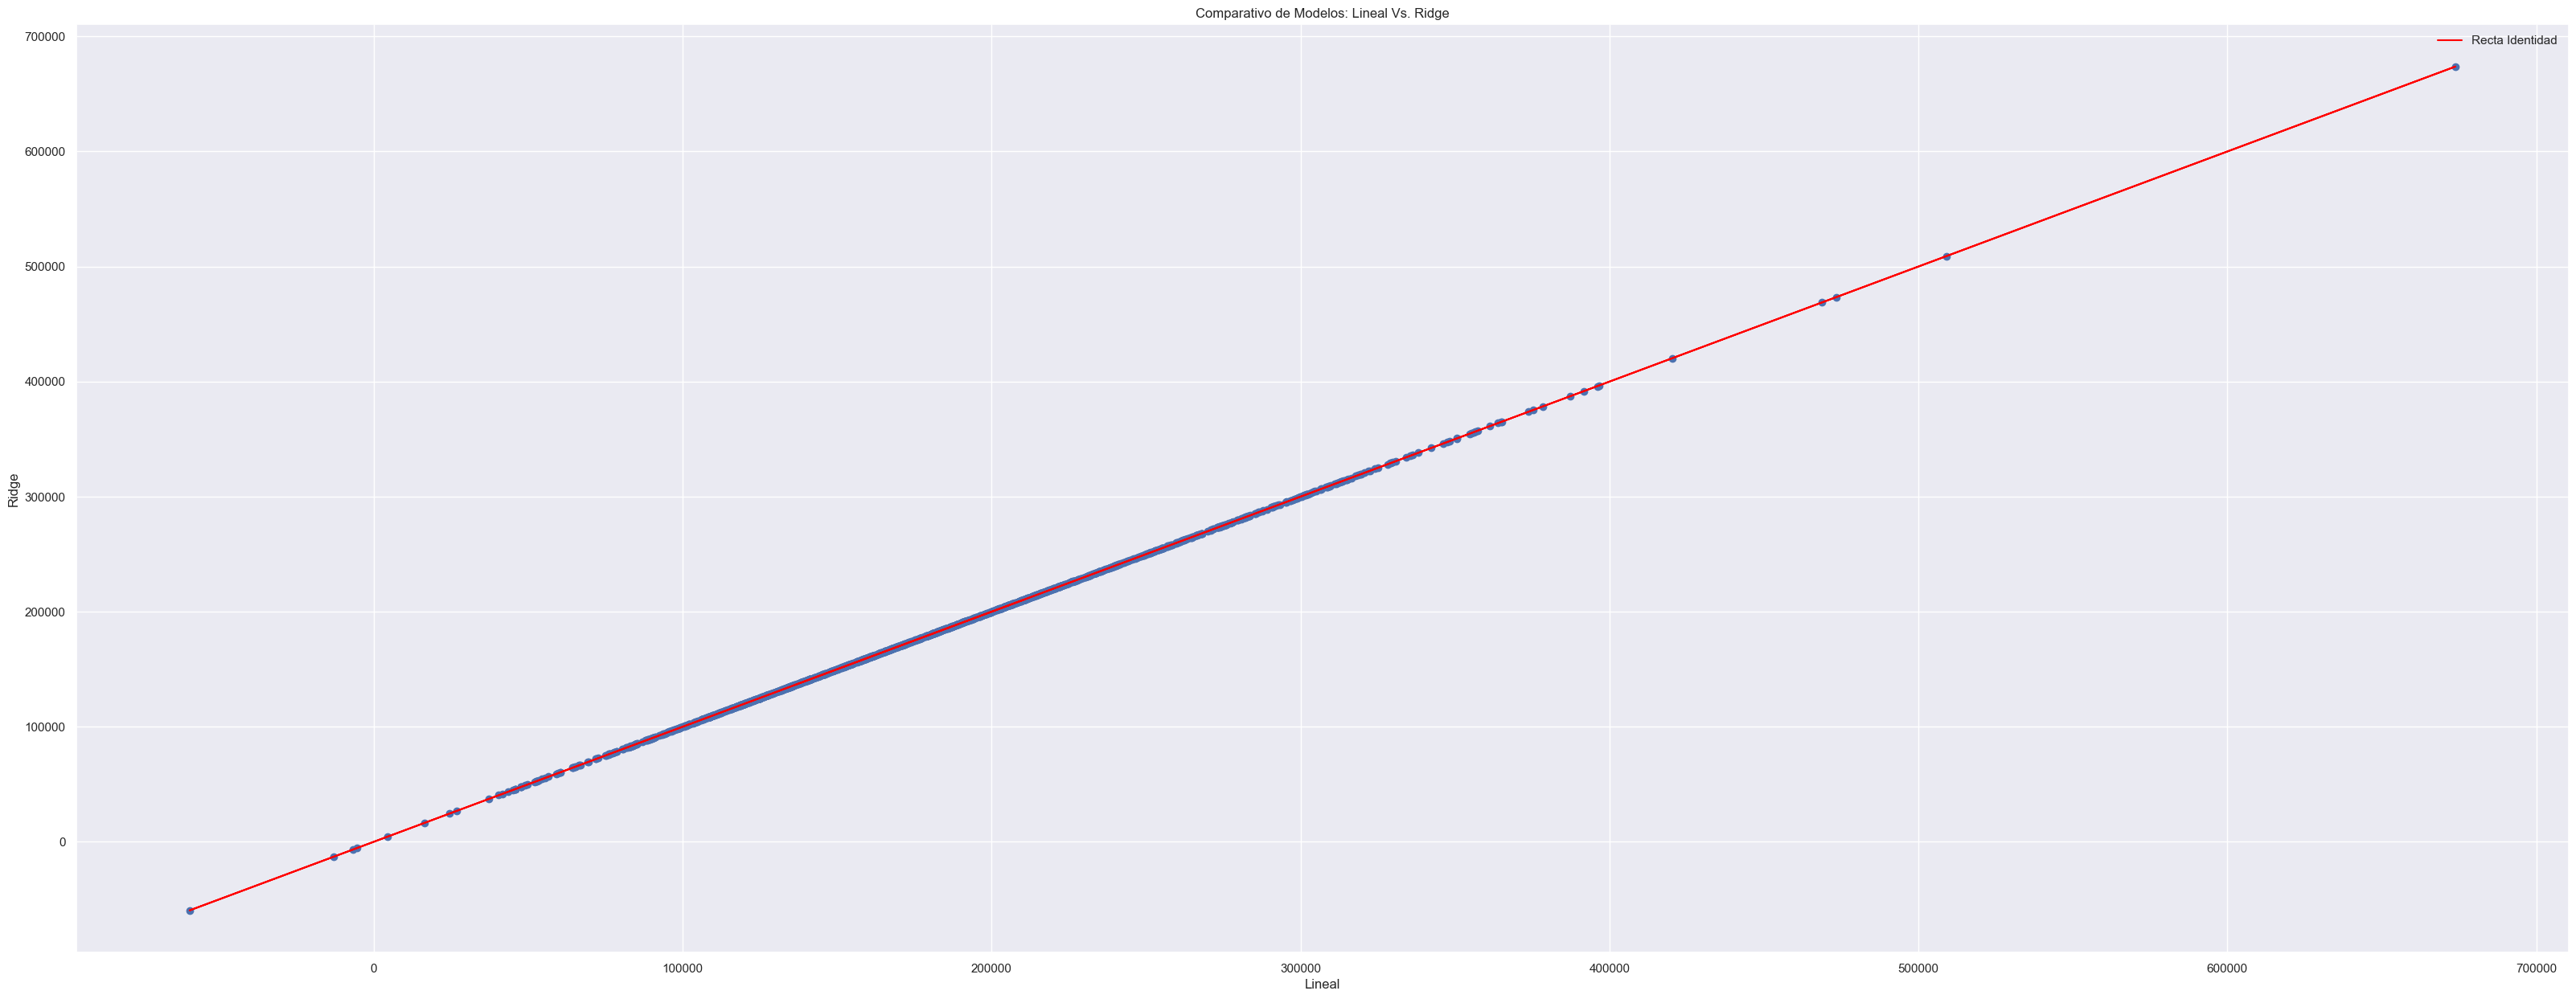

In [30]:
plt.scatter(y_linear,y_ridge) # Graficamos los valores reales vs los predichos por el modelo lasso
plt.plot(y_linear, y_linear, '-',color="red",label="Recta Identidad") # Graficamos la recta identidad
plt.title('Comparativo de Modelos: Lineal Vs. Ridge') # Titulo del grafico 
plt.xlabel('Lineal') # Etiqueta del eje x
plt.ylabel('Ridge') # Etiqueta del eje y
plt.legend(loc='best', frameon=False) # Mostramos la leyenda
plt.show() # Mostramos el grafico

## Lasso vs Ridge 

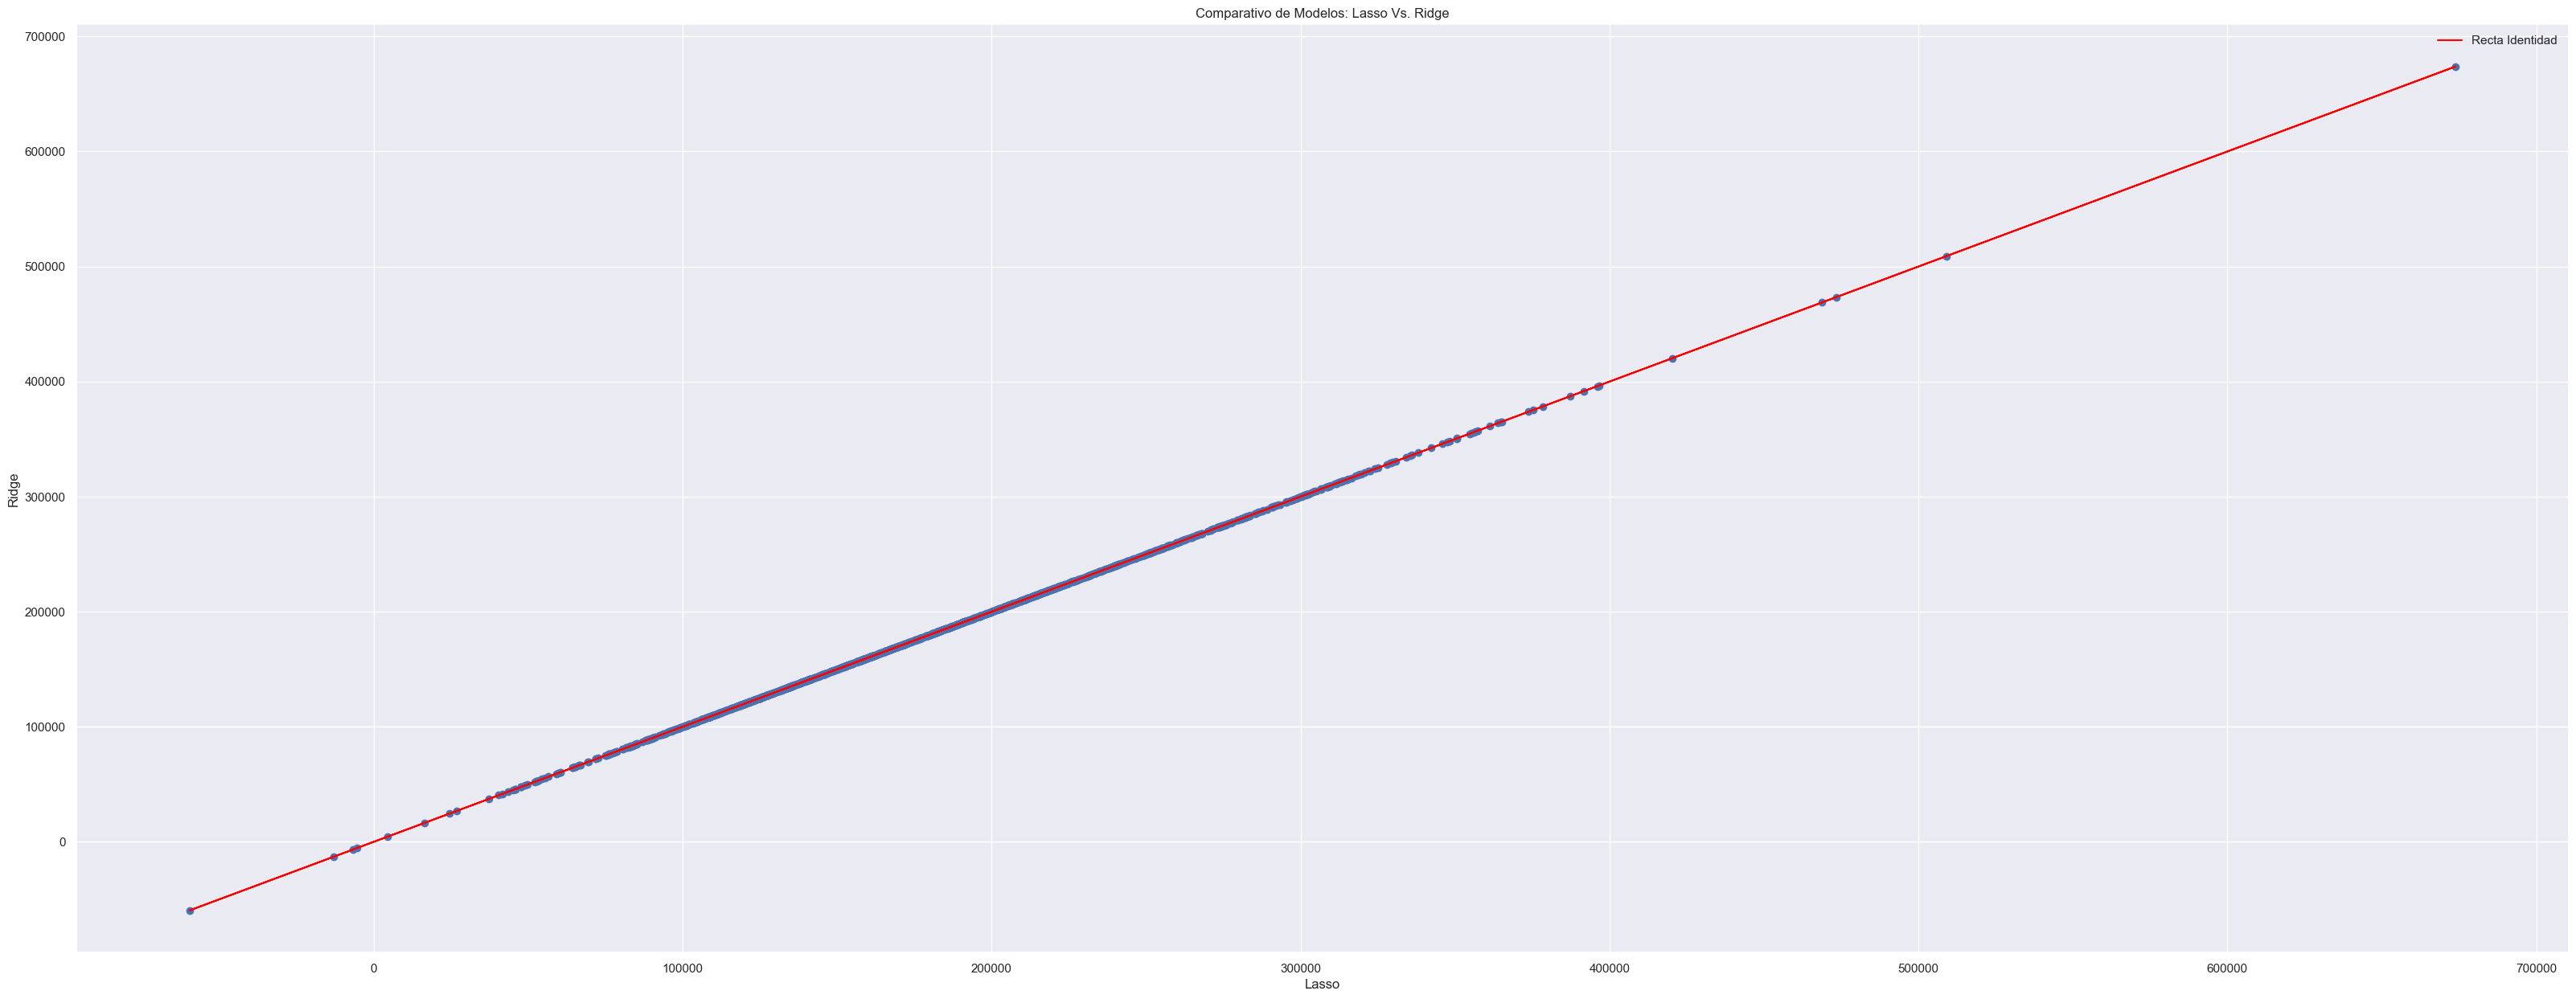

In [31]:
plt.scatter(y_lasso,y_ridge) # Graficamos los valores reales vs los predichos por el modelo lasso
plt.plot(y_lasso, y_lasso, '-',color = "red",label = "Recta Identidad") # Graficamos la recta identidad
plt.title('Comparativo de Modelos: Lasso Vs. Ridge') # Titulo del grafico
plt.xlabel('Lasso') # Etiqueta del eje x
plt.ylabel('Ridge') # Etiqueta del eje y
plt.legend(loc = 'best', frameon = False) # Mostramos la leyenda
plt.show() # Mostramos el grafico

* En conclusión, para obtener resultados más precisos, lo ideal sería experimentar con más variables respuesta y de esta manera buscar modelos que ajusten mejor desde el conjunto de entrenamiento.
---
* Si los tres modelos (regresión lineal, Ridge y Lasso) producen resultados similares, es probable que la regresión lineal simple sea suficiente para el conjunto de datos dado. Sin embargo, esto no siempre es el caso, ya que la elección del modelo depende de la naturaleza y la complejidad del conjunto de datos y del problema de predicción en cuestión.

* En términos generales, el modelo Ridge se utiliza cuando se sospecha que hay multicolinealidad en los datos y se quiere evitar el sobreajuste. Por otro lado, el modelo Lasso se utiliza cuando se sospecha que sólo un subconjunto de variables de entrada es relevante para el problema de predicción, y se desea realizar selección de características (feature selection). El modelo de regresión lineal simple es apropiado cuando no hay razones para sospechar multicolinealidad o cuando se desea mantener la simplicidad del modelo.

* En cualquier caso, es importante considerar la complejidad y la interpretabilidad de los modelos, así como la calidad de la predicción y la generalización a nuevos datos.